# Контрольная работа №1
Работа сдается в гугл-форму, которая будет закреплена в telegram конференции группы

Работа при сдаче в гугл форму должна называться КР_Фамилия_Имя_Отчество.ipynb

Перед сдачей просьба не стирать вывод ячеек для того, чтобы преподаватель заново не запускал ваш код

### Описание датасета
CREMA is a data set of 7,442 original clips from 91 actors. These clips were from 48 male and 43 female actors between the ages of 20 and 74 coming from a variety of races and ethnicities (African America, Asian, Caucasian, Hispanic, and Unspecified).
Actors spoke from a selection of 12 sentences. The sentences were presented using one of six different emotions (Anger, Disgust, Fear, Happy, Neutral, and Sad) and four different emotion levels (Low, Medium, High, and Unspecified).

## Задание.

1. ✅ Загрузить набор данных, приложенных к заданию.
2. ✅ Проанализируйте сбалансированность датасета
✅ подготовьте данные к работе модели п.4 (составьте набор как будто вам надо
✅ обучить модель классификации эмоциаонального настроения).   
✅ Произведите обработку данных и вычисление признаков речевых сигналов (Построение мел-спектрограмм, спектрограммму, waveform). К примеру можете взять одного спикера и одну фразу, проговоренную разными эмоциями. Можете взять спикеров разного пола и посмотреть их отличия.
3. ✅ Выполните различные способы аугментации данных (приложите визуализации).
4. (Дополнительный бал) Обучите модель распознавания эмоционального настроения по звуку. Можно использовать как ✅ Transfer Learning, так и спроектировать собственное решение. Прогоните распознование на случайных данных из выборки (выберите методов random)  
За инференс модели готовой модели тоже можно получить бал, но чуть меньше.

### P.S.
* 4-й пункт на дополнительные баллы, позволит перекрыть неправильные ответы в тесте.
* Прокомментируйте обработку данных и аугментацию данных

### P.S.S У вас всё получится, удачи :)

# Загрузка данных

In [ ]:
!pip install librosa matplotlib soundfile

In [ ]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import soundfile as sf
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file_path = 'Crema.zip'

if os.path.exists(file_path):
    print(f"Размер: {os.path.getsize(file_path)} байт")


Размер: 476134762 байт


In [ ]:
with zipfile.ZipFile('Crema.zip', 'r') as zip_ref:
    zip_ref.extractall('crema_data')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from transformers import AutoModelForAudioClassification, AutoFeatureExtractor

In [ ]:
!pip install torchaudio

In [ ]:
import torch

In [ ]:
import torchaudio

In [ ]:
def create_crema_dataframe():
    """Создание DataFrame с метаданными CREMA из реальных файлов"""
    audio_files = []

    # Получаем список всех WAV файлов
    wav_files = [f for f in os.listdir('crema_data/Crema/') if f.endswith('.wav')]
    print(len(wav_files))
    for file in wav_files:
        # Парсим имя файла по формату CREMA: ActorID_Sentence_Emotion_Intensity.wav
        parts = file.replace('.wav', '').split('_')

        audio_files.append({
            'filename': file,
            'actor_id': parts[0],
            'sentence': parts[1],
            'emotion': parts[2],
            'intensity': parts[3]})

    df = pd.DataFrame(audio_files)
    print(f"Создан DataFrame с {len(df)} записями")
    return df

# Создаем DataFrame
df = create_crema_dataframe()

7442
Создан DataFrame с 7442 записями


In [ ]:
df.head(10)

filename actor_id sentence emotion intensity
0  1063_ITH_ANG_XX.wav     1063      ITH     ANG        XX
1  1034_TAI_ANG_XX.wav     1034      TAI     ANG        XX
2  1090_IWL_HAP_XX.wav     1090      IWL     HAP        XX
3  1051_IWW_HAP_XX.wav     1051      IWW     HAP        XX
4  1024_TSI_FEA_XX.wav     1024      TSI     FEA        XX
5  1029_ITS_NEU_XX.wav     1029      ITS     NEU        XX
6  1071_TAI_NEU_XX.wav     1071      TAI     NEU        XX
7  1038_TSI_ANG_XX.wav     1038      TSI     ANG        XX
8  1043_IEO_HAP_HI.wav     1043      IEO     HAP        HI
9  1063_MTI_DIS_XX.wav     1063      MTI     DIS        XX

# Анализ сбалансированности датасета

In [ ]:
intensity_full = {
    'XX': 'Unspecified',
    'MD': 'Medium',
    'LO': 'Low',
    'HI': 'High'
}
df['intensity_full'] = df['intensity'].map(intensity_full)

In [ ]:
emotion_full = {
    'ANG': 'Anger',
    'DIS': 'Disgust',
    'FEA': 'Fear',
    'HAP': 'Happy',
    'NEU': 'Neutral',
    'SAD': 'Sad'
}
df['emotion_full'] = df['emotion'].map(emotion_full)

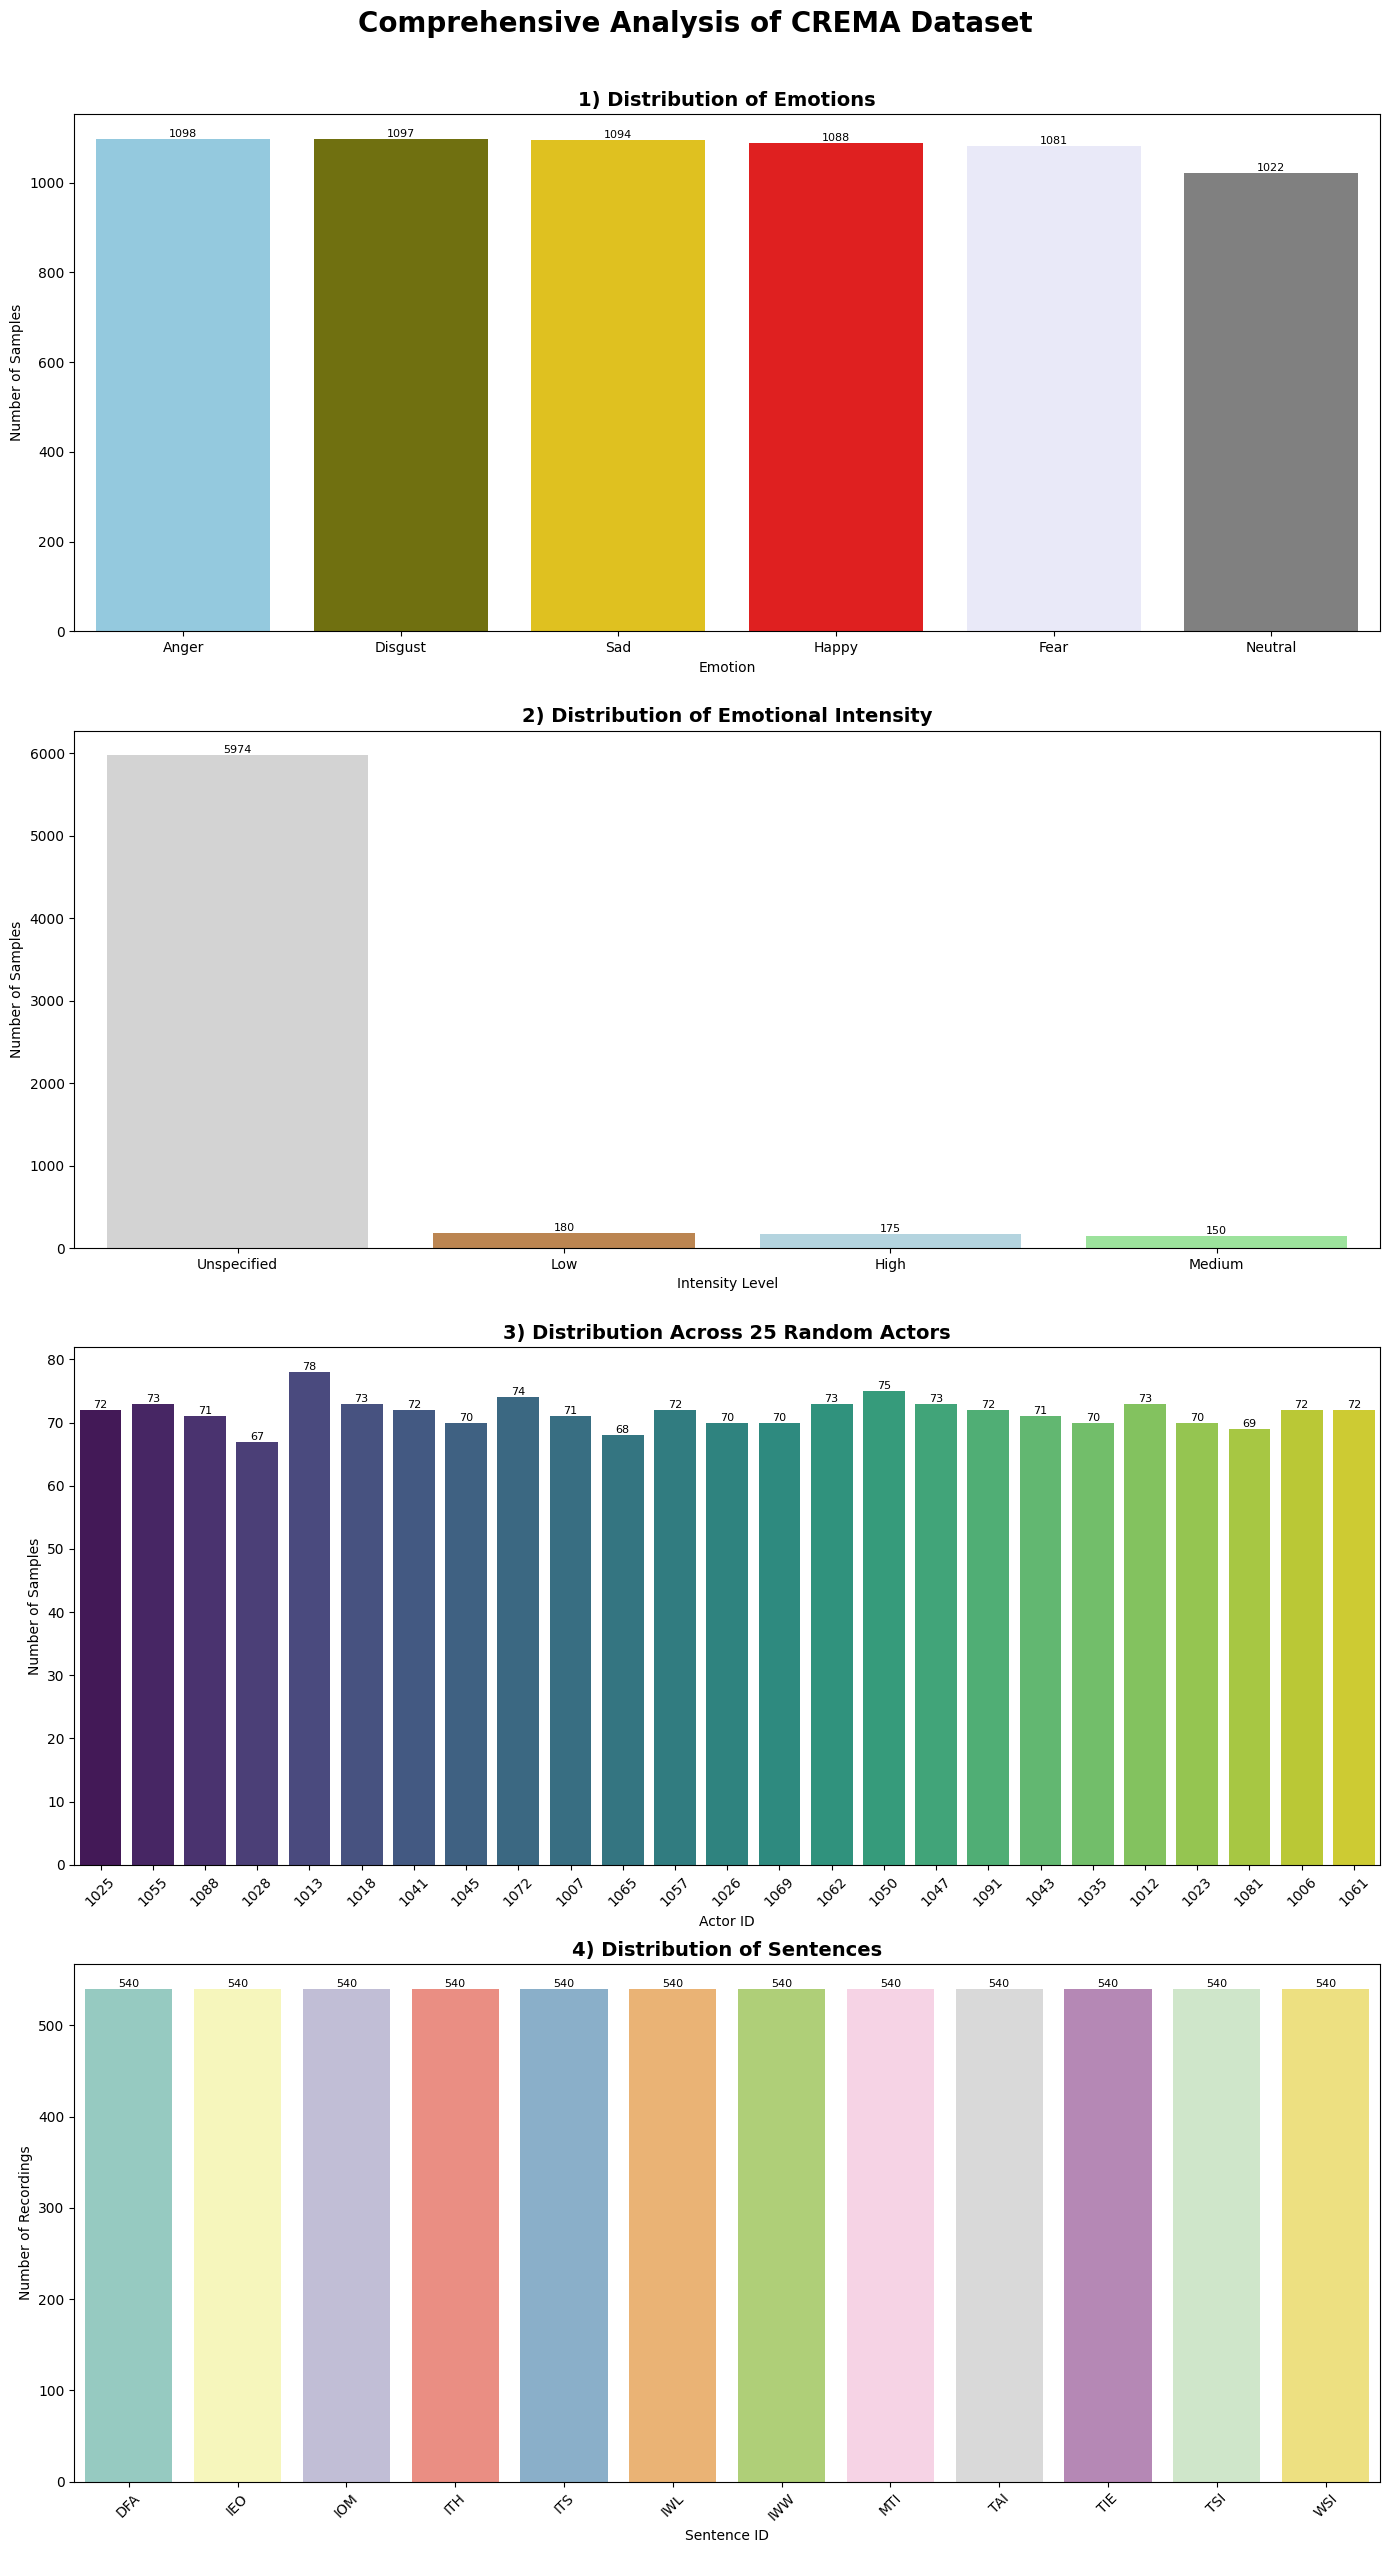

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(4, 1, figsize=(14, 26))
fig.suptitle('Comprehensive Analysis of CREMA Dataset', fontsize=20, fontweight='bold')

# emotions
emotion_colors = ['skyblue', 'olive', 'gold', 'red', 'lavender', 'gray']
ax1 = axes[0]
sns.countplot(data=df, x='emotion_full', order=df['emotion_full'].value_counts().index,
              palette=emotion_colors, ax=ax1)
ax1.set_title('1) Distribution of Emotions', fontweight='bold', fontsize=14)
ax1.set_xlabel('Emotion')
ax1.set_ylabel('Number of Samples')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=8)



# Intensity
intensity_colors = ['lightgrey', 'peru', 'lightblue', 'lightgreen']
ax3 = axes[1]
sns.countplot(data=df, x='intensity_full', order=df['intensity_full'].value_counts().index,
              palette=intensity_colors, ax=ax3)
ax3.set_title('2) Distribution of Emotional Intensity', fontweight='bold', fontsize=14)
ax3.set_xlabel('Intensity Level')
ax3.set_ylabel('Number of Samples')
for p in ax3.patches:
    ax3.annotate(f'{p.get_height():.0f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=8)


# 25 random actors
ax4 = axes[2]
random_actors = df['actor_id'].value_counts().sample(25, random_state=42).index
random_actors_data = df[df['actor_id'].isin(random_actors)]
sns.countplot(data=random_actors_data, x='actor_id', order=random_actors,
              palette='viridis', ax=ax4)
ax4.set_title('3) Distribution Across 25 Random Actors', fontweight='bold', fontsize=14)
ax4.set_xlabel('Actor ID')
ax4.set_ylabel('Number of Samples')
ax4.tick_params(axis='x', rotation=45)
for p in ax4.patches:
    ax4.annotate(f'{p.get_height():.0f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=8)


# Sentences
ax5 = axes[3]
sns.countplot(data=df, x='sentence', order=df['sentence'].value_counts().index,
              palette='Set3', ax=ax5)
ax5.set_title('4) Distribution of Sentences', fontweight='bold', fontsize=14)
ax5.set_xlabel('Sentence ID')
ax5.set_ylabel('Number of Recordings')
ax5.tick_params(axis='x', rotation=45)
for p in ax5.patches:
    ax5.annotate(f'{p.get_height():.0f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=8)


plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()


In [ ]:
print("SUMMARY STATISTICS:")
print(f"Total samples: {len(df)}")
print("\nEmotion distribution:")
print(df['emotion_full'].value_counts())
print("\nDisribution of intensity:")
print(df['intensity_full'].value_counts())
print("\nDisribution of actors:")
print(df['actor_id'].value_counts())
print("\nDisribution of types of sentences:")
print(df['sentence'].value_counts())

SUMMARY STATISTICS:
Total samples: 6480

Emotion distribution:
emotion_full
Anger      1098
Disgust    1097
Sad        1094
Happy      1088
Fear       1081
Neutral    1022
Name: count, dtype: int64

Disribution of intensity:
intensity_full
Unspecified    5974
Low             180
High            175
Medium          150
Name: count, dtype: int64

Disribution of actors:
actor_id
1013    78
1024    76
1052    75
1068    75
1050    75
        ..
1058    67
1034    67
1028    67
1019    65
1009    63
Name: count, Length: 91, dtype: int64

Disribution of types of sentences:
sentence
DFA    540
IEO    540
IOM    540
ITH    540
ITS    540
IWL    540
IWW    540
MTI    540
TAI    540
TIE    540
TSI    540
WSI    540
Name: count, dtype: int64


**Сбалансированность датасета выводы:**
- Эмоции: Датесет почти идеально сбалансирован, за исключением нейтральной эмоции, которой немного меньше (1087 vs 1271). Разница не критичная.
- Интенсивность: Подавляющее большинство записей (6076 из 7442) имеют не специфичную // не указанную интенсивность (Unspecified). Остальные три уровня интенсивности (Low, Medium, High) представлены равномерно (по 455 записей). Это означает, что для задач на определение интенсивности, возможно, придется использовать только размеченные данные и пользоваться аугментацией.
- Дикторы: В датасете 91 диктор, каждый из которых записал примерно от 76 до 82 записей. Распределение довольно равномерное.
- Тип предложений: Одно предложение (IEO) представлено значительно большим количеством записей (1456), чем остальные (около 540-546). Возможно, придется как-то скларировать данные, чтобы модель не переобучилась на одном предложении (либо каким-то другим образом избавиться от не сбалансированности).

# Построение спектограмм и осцилограммы

In [ ]:
df['filepath'] = df['filename'].apply(lambda x: os.path.join('crema_data/Crema/', x))

In [ ]:
# Для примера я взяла одного диктора и один тип предложения
actor_id = '1056'
sentence = 'IEO'

subset_df = df[(df['actor_id'] == actor_id) & (df['sentence'] == sentence)]

print(subset_df[['filename', 'filepath', 'emotion', 'intensity']])

                filename                              filepath emotion  \
656  1056_IEO_FEA_HI.wav  crema_data/Crema/1056_IEO_FEA_HI.wav     FEA   
858  1056_IEO_DIS_HI.wav  crema_data/Crema/1056_IEO_DIS_HI.wav     DIS   
866  1056_IEO_FEA_LO.wav  crema_data/Crema/1056_IEO_FEA_LO.wav     FEA   
874  1056_IEO_NEU_XX.wav  crema_data/Crema/1056_IEO_NEU_XX.wav     NEU   
918  1056_IEO_HAP_HI.wav  crema_data/Crema/1056_IEO_HAP_HI.wav     HAP   

    intensity  
656        HI  
858        HI  
866        LO  
874        XX  
918        HI  


In [ ]:
emotion_names = {
    'ANG': 'Anger', 'DIS': 'Disgust', 'FEA': 'Fear',
    'HAP': 'Happy', 'NEU': 'Neutral', 'SAD': 'Sad'
}

intensity_names = {
    'HI': 'High', 'MD': 'Medium', 'LO': 'Low', 'XX': 'Unspecified'
}

In [ ]:
def plot_audio_features_modern_mel(file_path, emotion, sr=22050):
    y, sr = librosa.load(file_path, sr=sr)

    duration = len(y) / sr  # Длительность сигнала в секундах

    # Параметры для спектограммы, принятые в современных лингвистических фонетических исследованиях
    window_length = 0.005
    n_fft_praat = int(sr * window_length)
    hop_length_praat = n_fft_praat // 2
    dynamic_range = 50.0

    # Параметры для mel-спектограммы (стандарт о котором пишут на различных сайтах :) )
    n_fft = 2048
    hop_length = 512
    n_mels = 128

    plt.figure(figsize=(12, 8))

    # 1) Осцилограмма
    plt.subplot(3, 1, 1)
    time = np.linspace(0, duration, len(y))
    plt.plot(time, y, 'b-', linewidth=0.8)
    plt.title(f'Waveform - {emotion}', fontweight='bold', fontsize=12)
    plt.ylabel('Amplitude')
    plt.grid(True, alpha=0.3)
    plt.xlim(0, duration)

    # 2) Спектограмма
    plt.subplot(3, 1, 2)
    D = np.abs(librosa.stft(y, n_fft=n_fft_praat, hop_length=hop_length_praat, window='hann'))
    D_db = librosa.amplitude_to_db(D, ref=np.max)
    librosa.display.specshow(D_db, sr=sr, hop_length=hop_length_praat,
                              x_axis='time', y_axis='linear',
                              cmap='binary', vmin=-dynamic_range, vmax=0) # специально сделала черно-белой, мне так привычнее((
    plt.ylim(0, 5000)
    plt.xlim(0, duration)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - {emotion}', fontweight='bold', fontsize=12)
    plt.ylabel('Frequency (Hz)')

    # 3) Mel-спектограмма
    plt.subplot(3, 1, 3)
    mel_spec = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        hop_length=hop_length,
        n_fft=n_fft,
        n_mels=n_mels,
        fmax=sr // 2
    )
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    librosa.display.specshow(mel_spec_db, sr=sr, hop_length=hop_length,
                              x_axis='time', y_axis='mel',
                              cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-cпектограмма - {emotion}', fontweight='bold', fontsize=12)
    plt.ylabel('Mel Frequency')
    plt.xlabel('Time (s)')
    plt.xlim(0, duration)

    plt.tight_layout()
    plt.show()
    print(f"Спектрограмма:")
    print(f"  - Диапазон: 0-5000 Hz")
    print(f"  - Динамический диапазон: {dynamic_range} dB")
    print(f"  - n_fft: {n_fft_praat}, hop_length: {hop_length_praat}")
    print(f"\nМел-спектрограмма:")
    print(f"  - n_fft: {n_fft}")
    print(f"  - hop_length: {hop_length}")
    print(f"  - n_mels: {n_mels}")

In [ ]:
high_intensity_df = subset_df[subset_df['intensity'] == 'HI']

print(f"Найдено {len(high_intensity_df)} записей с высокой интенсивностью")

Найдено 3 записей с высокой интенсивностью


ВИЗУАЛИЗАЦИЯ

Анализ: Fear (интенсивность: HI)
Файл: 1056_IEO_FEA_HI.wav


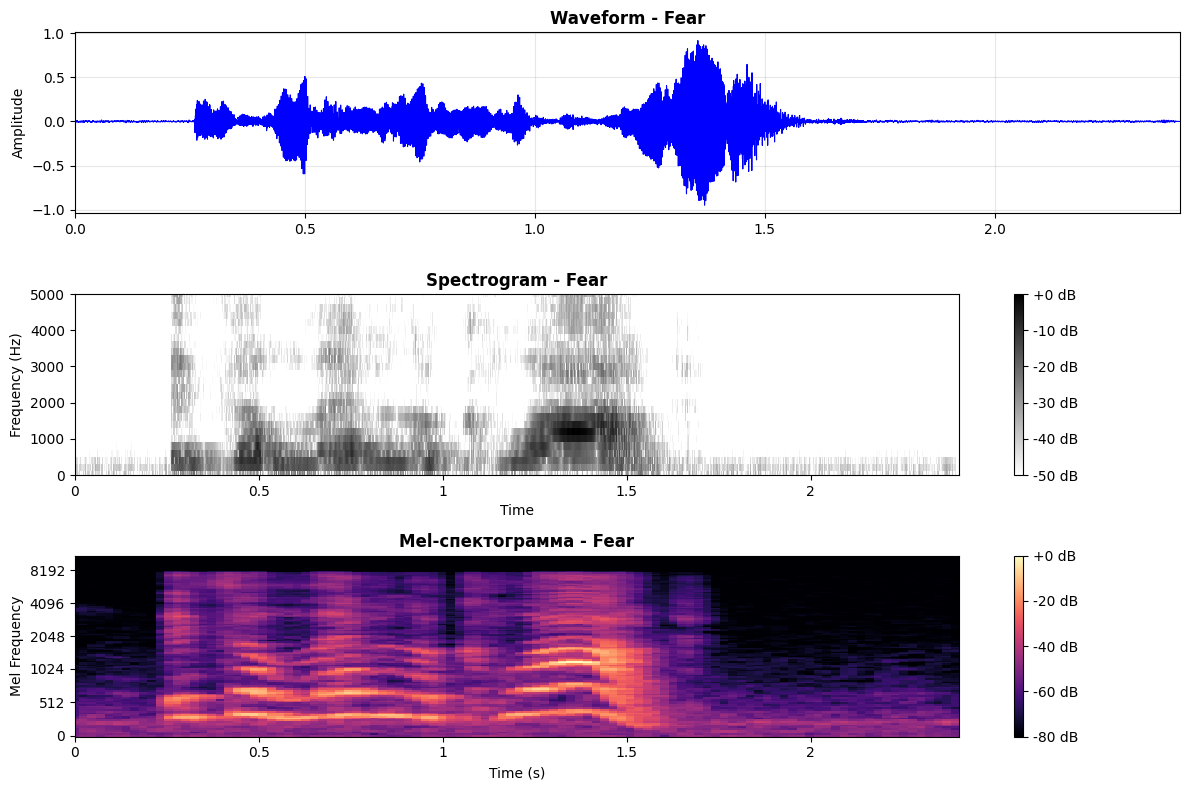

Спектрограмма:
  - Диапазон: 0-5000 Hz
  - Динамический диапазон: 50.0 dB
  - n_fft: 110, hop_length: 55

Мел-спектрограмма:
  - n_fft: 2048
  - hop_length: 512
  - n_mels: 128

Анализ: Disgust (интенсивность: HI)
Файл: 1056_IEO_DIS_HI.wav


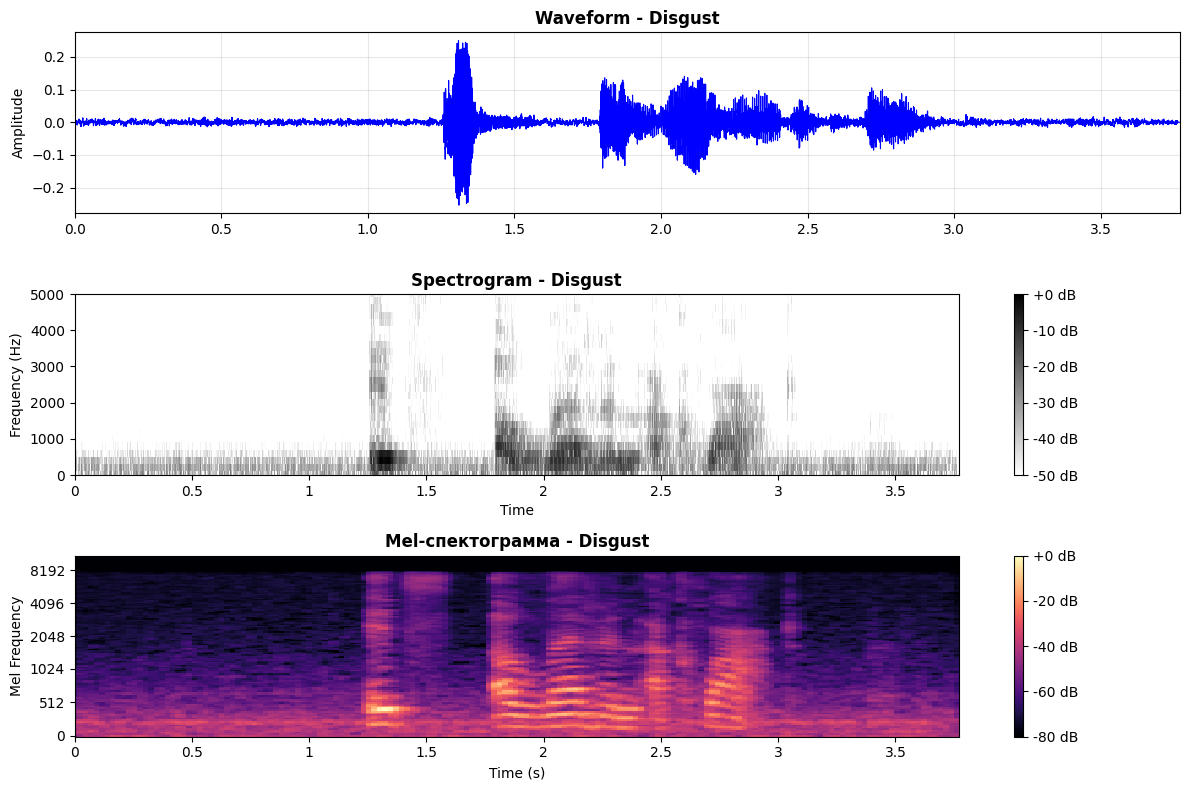

Спектрограмма:
  - Диапазон: 0-5000 Hz
  - Динамический диапазон: 50.0 dB
  - n_fft: 110, hop_length: 55

Мел-спектрограмма:
  - n_fft: 2048
  - hop_length: 512
  - n_mels: 128

Анализ: Happy (интенсивность: HI)
Файл: 1056_IEO_HAP_HI.wav


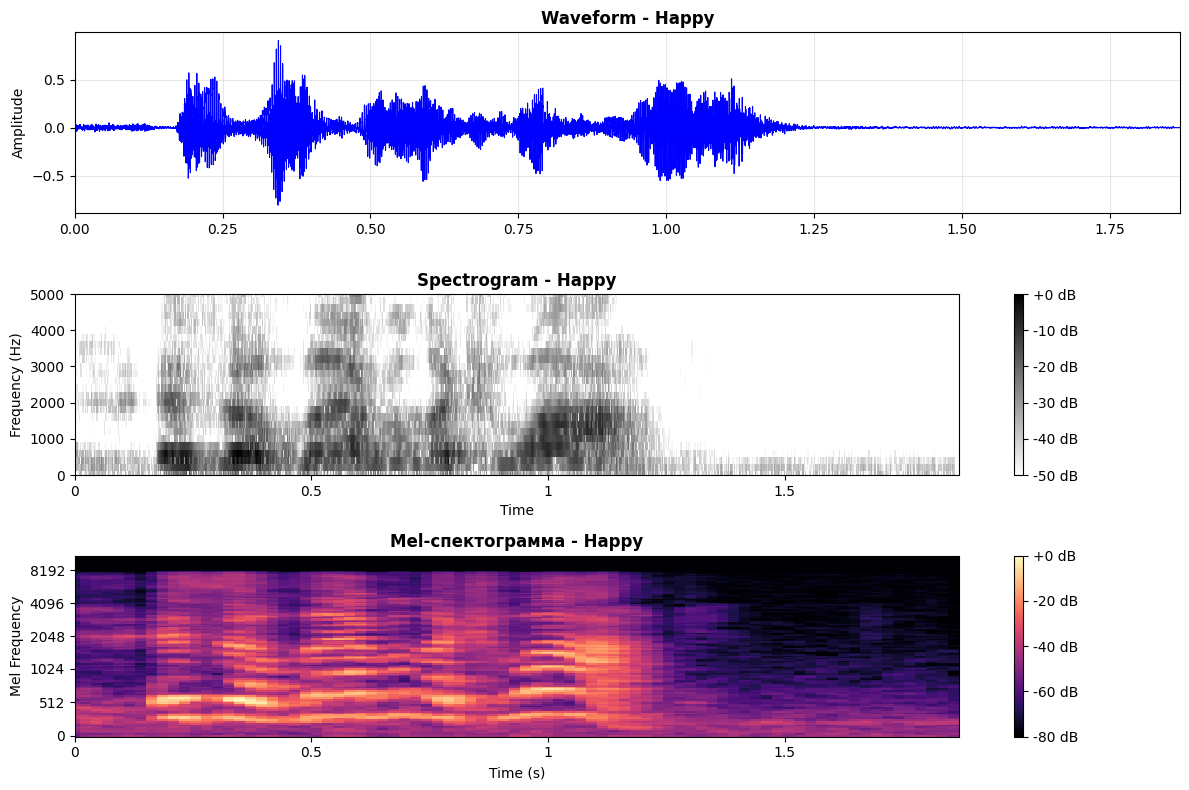

Спектрограмма:
  - Диапазон: 0-5000 Hz
  - Динамический диапазон: 50.0 dB
  - n_fft: 110, hop_length: 55

Мел-спектрограмма:
  - n_fft: 2048
  - hop_length: 512
  - n_mels: 128


In [ ]:
print("ВИЗУАЛИЗАЦИЯ")


for _, row in high_intensity_df.iterrows():
    emotion_name = emotion_names.get(row['emotion'], row['emotion'])
    print(f"\nАнализ: {emotion_name} (интенсивность: {row['intensity']})")
    print(f"Файл: {row['filename']}")

    plot_audio_features_modern_mel(row['filepath'], emotion_name)

**Анализ полученных иллюстративных материалов:**
- Осцилограмма: для гнева наблюдается самая высокая амплитуда; для грусти самая маленькая амплитуда. В целом, это были довольно ожидаемые резульаты.
- Спектограммы: на обоих спектограммах достаточно четко различмы гласные vs согласные, что говорит о хорошем качестве аудио и стабильной работе обоих программ. Исключением является радость и страх, но судя по затемненности F0 это просто сами по себе очень зашумленные записи (возможно, помехи или посторонние звуки и т.д.)
- На обычной спектограмме лучше видны взырвы от взрывных согласных, а на mel-спектограмме лучше виден шум шумных
- Интересно, что в зависимости от выражаемой эмоции по спектограммам и осцилограммы видно, что совсем на разных частях акцент. То есть, например, в disgust -- первый гласный в высказывании явно ударный с фразовым акцентом на нем, остальные уже редуцированы. В Fear - фразовое ударение явно на последнем слове, а в Anger как будто каждый слог (гласный) ударный. (я специально не слушала записи, чтобы не знать, что в них). То есть можно утверждать, что в зависимости от выражаемой эмоции диктор выделяет разные части предложения (где-то это 1 слово, где-то он пословно маркирует каждое слово)
- Как мне кажется какие там могут быть звуки:

*два или три фонетических слова. в случае, если тут 3 слова, то первое часто примыкает ко второму и может быть безударной клитикой

*последний звук в предложении точно какой-то глухой взрывной -- возможно, k

*после первого слова (1 сложного) идет гласный, а после него какой-то согласный типа m/n/l

*первое слово заканчивается какой-то глухой и короткой аффрикатой, например, t͡s

- Для улучшение анализа, возможно, еще можно менять параметры


Еще одно замечание: вообще по этим записям, если хорошо почистить их от шума было бы интересно поисследовать реализацию согласных, потому что в английском, в отличае от русского языка, согласные различаются не по звукости / глухости, а напряженности // ненапряженности. И если при записи эта напряженность контролировалась внешними условиями, то может можно было бы обучить классификатор, который бы хорошо мог различать согласные фонемы.

##Дополнительно

### Хотела посмотреть на различные параметры для mel-спектограммы

In [ ]:
def compare_mel_parameters_enhanced(file_path, emotion, sr=22050):
    y, sr = librosa.load(file_path, sr=sr)

    fig, axes = plt.subplots(3, 3, figsize=(18, 15))

    settings = [
        {'n_mels': 64, 'n_fft': 1024, 'hop_length': 512, 'title': '64 Mels, n_fft=1024'},
        {'n_mels': 128, 'n_fft': 2048, 'hop_length': 512, 'title': '128 Mels, n_fft=2048'},
        {'n_mels': 256, 'n_fft': 4096, 'hop_length': 512, 'title': '256 Mels, n_fft=4096'},

        # hop_length
        {'n_mels': 128, 'n_fft': 2048, 'hop_length': 256, 'title': '128 Mels, hop=256'},
        {'n_mels': 128, 'n_fft': 2048, 'hop_length': 1024, 'title': '128 Mels, hop=1024'},

        # fmax
        {'n_mels': 128, 'n_fft': 2048, 'fmax': 4000, 'title': '128 Mels, fmax=4000'},
        {'n_mels': 128, 'n_fft': 2048, 'fmax': 8000, 'title': '128 Mels, fmax=8000'},
        {'n_mels': 128, 'n_fft': 2048, 'fmax': sr//2, 'title': '128 Mels, fmax=Nyquist'},

        {'n_mels': 512, 'n_fft': 1024, 'hop_length': 256, 'title': '512 Mels, n_fft=1024, hop=256'}
    ]

    for idx, setting in enumerate(settings):
        row = idx // 3
        col = idx % 3
        ax = axes[row, col]

        params = {k: v for k, v in setting.items() if k != 'title'}

        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, **params)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

        hop_length = params.get('hop_length', 512)

        img = librosa.display.specshow(mel_spec_db, sr=sr, hop_length=hop_length,
                                       x_axis='time', y_axis='mel', ax=ax,
                                       cmap='magma')
        ax.set_title(f"{setting['title']}", fontweight='bold', fontsize=10)

        if row == 2:
            ax.set_xlabel('Time (s)')
        if col == 0:
            ax.set_ylabel('Mel Frequency')

    plt.suptitle(f'Cравнение параметров mel-спектограммы: {emotion}',
                 fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


СРАВНЕНИЕ ПАРАМЕТРОВ МЕЛ-СПЕКТРОГРАММЫ ДЛЯ: Happy
Файл: 1056_IEO_HAP_HI.wav
Интенсивность: HI


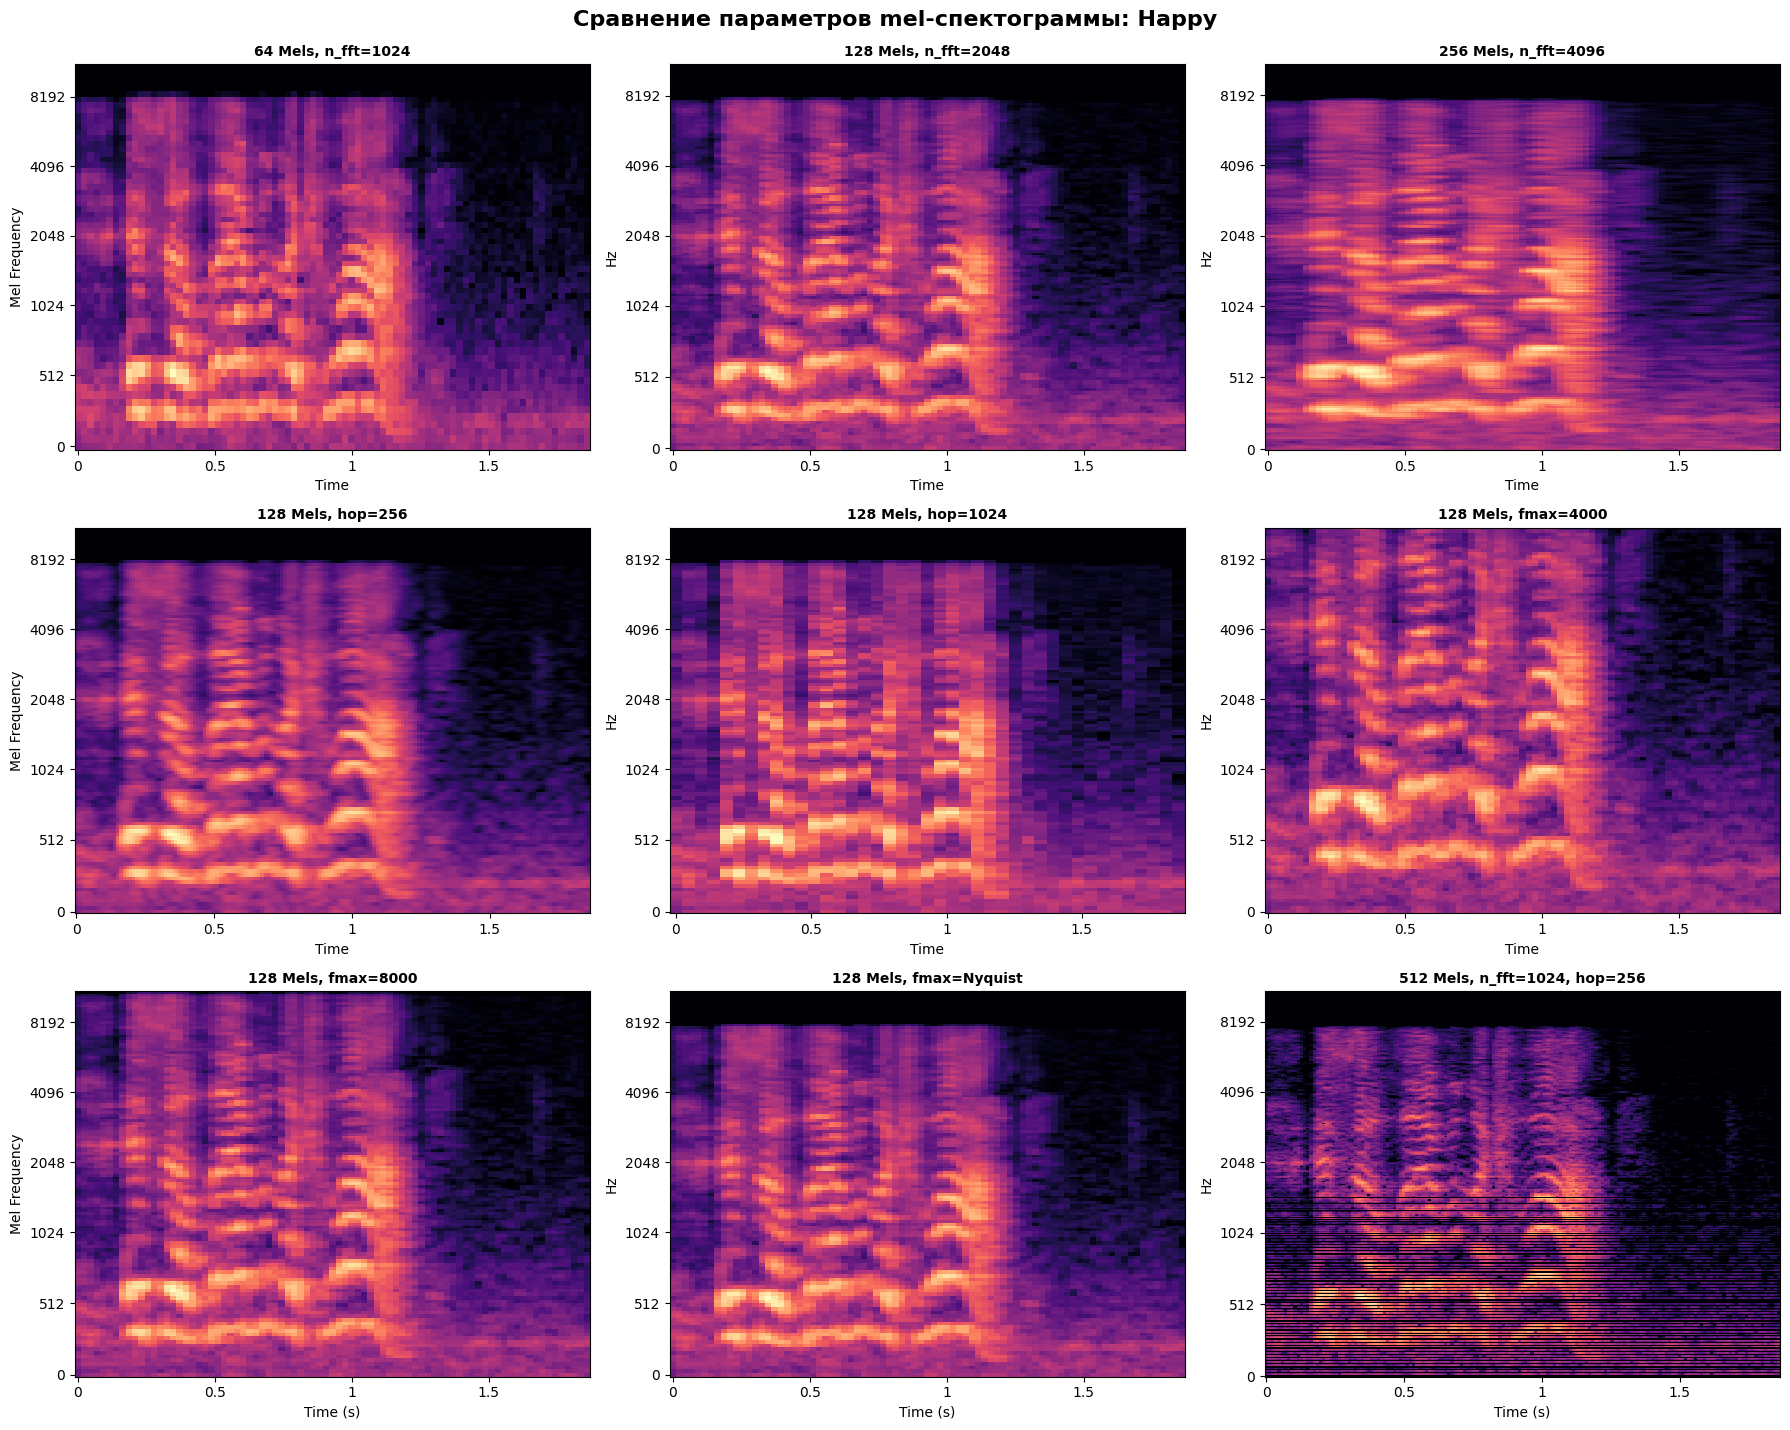

In [ ]:
happy_row = subset_df[subset_df['emotion'] == 'HAP']
if len(happy_row) > 0:
    sample_row = happy_row.iloc[0]
    emotion_name = emotion_names.get(sample_row['emotion'], sample_row['emotion'])

    print(f"СРАВНЕНИЕ ПАРАМЕТРОВ МЕЛ-СПЕКТРОГРАММЫ ДЛЯ: {emotion_name}")
    print(f"Файл: {sample_row['filename']}")
    print(f"Интенсивность: {sample_row['intensity']}")

    compare_mel_parameters_enhanced(sample_row['filepath'], emotion_name)


### Мне еще было интересно посмотреть как на питоне извлекать pitch

In [ ]:
!pip install praat-parselmouth

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 63.9 MB/s eta 0:00:00


In [ ]:
import parselmouth

def plot_praat_spectrogram_with_pitch(filepath, emotion, sr=22050):
  y, sr = librosa.load(filepath, sr=sr)
  snd = parselmouth.Sound(filepath)

  window_length = 0.01
  n_fft_praat = int(sr * window_length)
  hop_length_praat = n_fft_praat // 2
  dynamic_range = 45.0

  # Спектрограмма
  D = np.abs(librosa.stft(y, n_fft=n_fft_praat, hop_length=hop_length_praat, window='hann'))
  D_db = librosa.amplitude_to_db(D, ref=np.max)

  # Pitch
  pitch = snd.to_pitch(time_step=hop_length_praat / sr, pitch_floor=100, pitch_ceiling=600)
  pitch_values = pitch.selected_array['frequency']
  pitch_values[pitch_values == 0] = np.nan
  pitch_times = pitch.xs()

  plt.figure(figsize=(9, 5))
  librosa.display.specshow(D_db, sr=sr, hop_length=hop_length_praat,
                           x_axis='time', y_axis='linear',
                           cmap='binary', vmin=-dynamic_range, vmax=0)

  # Pitch contour
  plt.plot(pitch_times, pitch_values, color='red', linewidth=2.5, label='Pitch contour')
  plt.plot(pitch_times, pitch_values, color='white', linewidth=1)

  plt.colorbar(format='%+2.0f dB', label='Amplitude (dB)')
  plt.title(f'Spectrogram with Pitch - {emotion}', fontsize=14, fontweight='bold')
  plt.xlabel('Time (s)')
  plt.ylabel('Frequency (Hz)')
  plt.ylim(0, 3000)
  plt.grid(alpha=0.2)
  plt.tight_layout()
  plt.show()

СПЕКТРОГРАММА С PITCH

Fear (интенсивность: HI)


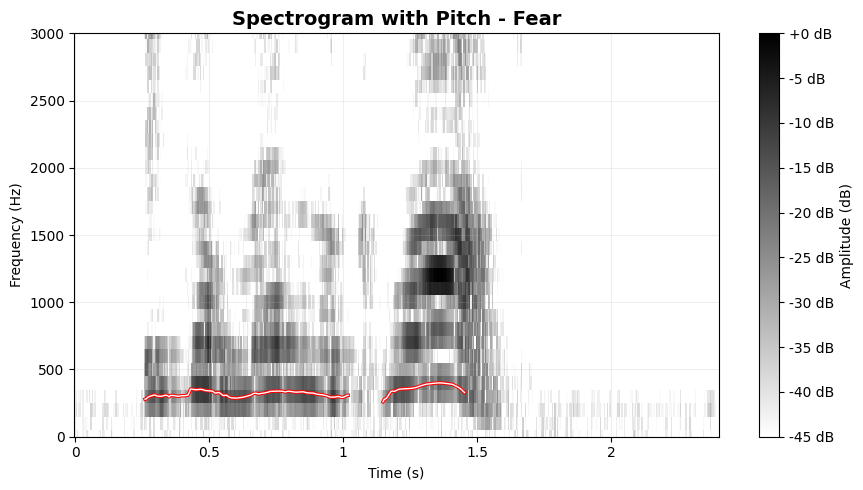


Disgust (интенсивность: HI)


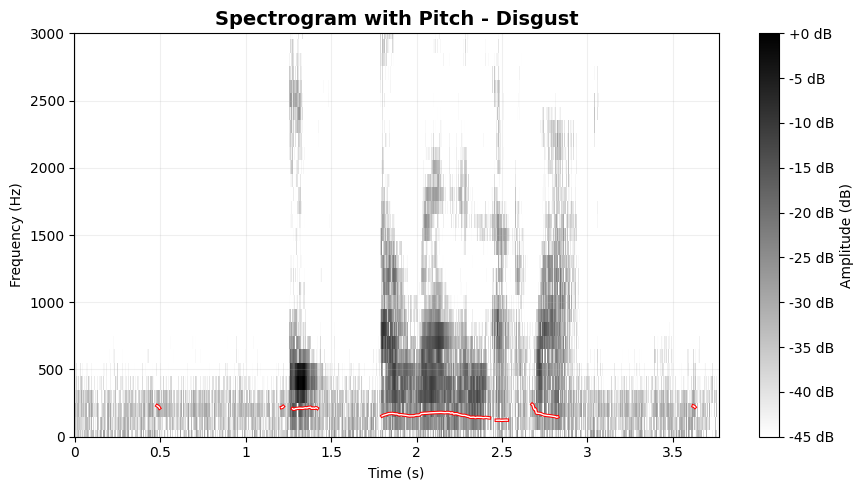


Fear (интенсивность: LO)


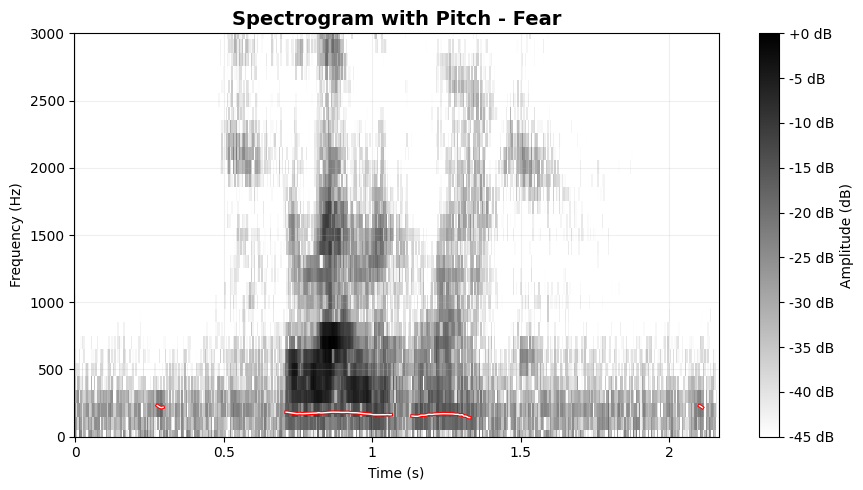


Neutral (интенсивность: XX)


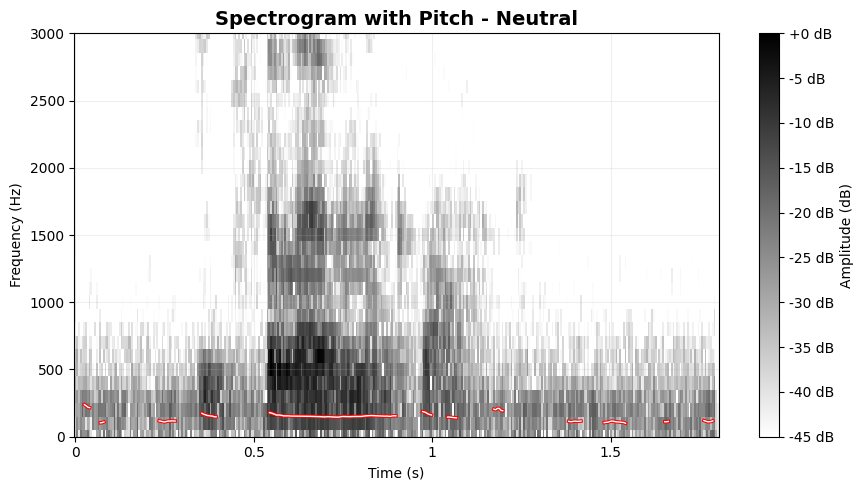


Happy (интенсивность: HI)


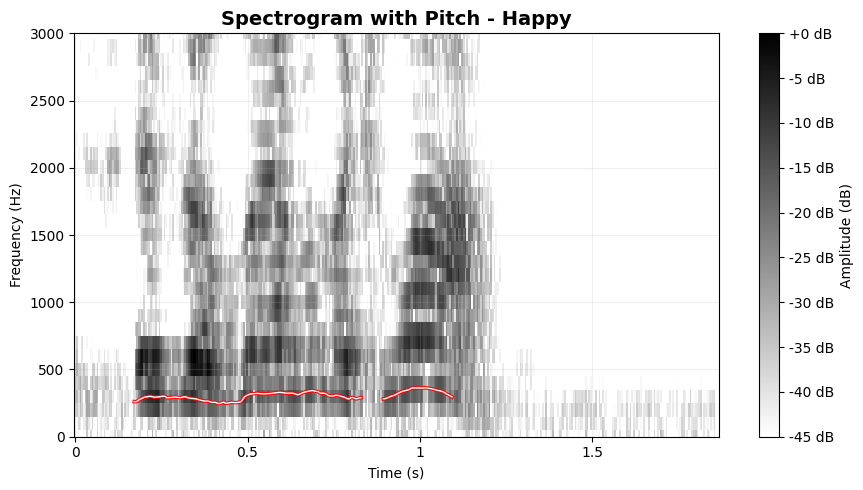

In [ ]:
print("СПЕКТРОГРАММА С PITCH")
for _, row in subset_df.iterrows():
    emotion_name = emotion_names.get(row['emotion'], row['emotion'])
    print(f"\n{emotion_name} (интенсивность: {row['intensity']})")
    plot_praat_spectrogram_with_pitch(row['filepath'], emotion_name)


На самом деле получилось очень интересно, хотя и не так, как я ожидала, что это будет выглядить. Изменение мелодического контура хорошо видно только на записях с высокой интенсивностью (и иногда со средней интенсивностью).
Самая прикольная -- первая картинка. На ней очень интересно, что есть явные два тональный акцента и при этом они реализованы на одном уровне. Обычно (для русского языка), если в рамках одного предложения акценты на 2 подряд идущих словах, то второй акцент реализуется на уровень ниже, чем первый (downstep), а тут это не происходит.

# Аугментация

In [ ]:
def add_noise(y, noise_level=0.01):
    """"Добавление шума"""
    noise = np.random.randn(len(y))
    return y + noise_level * noise

def shift_time(y, shift_max=0.2):
    """Смещение по времени"""
    shift = int(np.random.uniform(-shift_max, shift_max) * len(y))
    return np.roll(y, shift)


def change_volume(y, volume_factor=1.5):
    """Изменение громкости"""
    return y * volume_factor

In [ ]:
def visualize_augmentations(original_audio_path, emotion, sr=22050):

    # Загружаем оригинальное аудио
    y_original, sr = librosa.load(original_audio_path, sr=sr)

    # Базовые настройки для отображения не измененной спектограммы
    n_fft = 2048
    hop_length = 512
    n_mels = 128

    augmented_audio = {
        'Original': y_original,
        'Noise': add_noise(y_original),
        'Time Shift': shift_time(y_original, shift_max=2),
        'Volume Change': change_volume(y_original, volume_factor=-1.8)
    }

    fig, axes = plt.subplots(len(augmented_audio), 3, figsize=(20, 4 * len(augmented_audio)))
    fig.suptitle(f'{emotion}', fontsize=16, fontweight='bold', y=0.98)

    for idx, (aug_name, y_aug) in enumerate(augmented_audio.items()):
        # 2) Осцилограмма
        time_orig = np.linspace(0, len(y_original)/sr, len(y_original))
        time_aug = np.linspace(0, len(y_aug)/sr, len(y_aug))

        max_time = min(5, len(y_original)/sr, len(y_aug)/sr)
        max_samples_orig = int(max_time * sr)
        max_samples_aug = int(max_time * sr)

        axes[idx, 0].plot(time_orig[:max_samples_orig], y_original[:max_samples_orig],
                         'b-', alpha=0.7, label='Original')
        axes[idx, 0].plot(time_aug[:max_samples_aug], y_aug[:max_samples_aug],
                         'r-', alpha=0.7, label='Augmented')
        axes[idx, 0].set_title(f'Waveform: {aug_name}', fontweight='bold')
        axes[idx, 0].set_ylabel('Amplitude')
        axes[idx, 0].legend()
        axes[idx, 0].grid(True, alpha=0.3)

        # 2) Мел-спектрограмма оригинального аудио
        mel_spec_orig = librosa.feature.melspectrogram(
            y=y_original,
            sr=sr,
            hop_length=hop_length,
            n_fft=n_fft,
            n_mels=n_mels,
            fmax=sr // 2
        )
        mel_spec_orig_db = librosa.power_to_db(mel_spec_orig, ref=np.max)
        im1 = librosa.display.specshow(mel_spec_orig_db, sr=sr, hop_length=hop_length,
                                     x_axis='time', y_axis='mel',
                                     ax=axes[idx, 1], cmap='magma')
        axes[idx, 1].set_title('Mel-spectrogram: Original', fontweight='bold')
        axes[idx, 1].set_ylabel('Mel Frequency')
        plt.colorbar(im1, ax=axes[idx, 1], format='%+2.0f dB')

        # 3) Мел-спектрограмма аугментированной версии
        mel_spec_aug = librosa.feature.melspectrogram(
            y=y_aug,
            sr=sr,
            hop_length=hop_length,
            n_fft=n_fft,
            n_mels=n_mels,
            fmax=sr // 2
        )
        mel_spec_aug_db = librosa.power_to_db(mel_spec_aug, ref=np.max)
        im2 = librosa.display.specshow(mel_spec_aug_db, sr=sr, hop_length=hop_length,
                                     x_axis='time', y_axis='mel',
                                     ax=axes[idx, 2], cmap='magma')
        axes[idx, 2].set_title(f'Mel-spectrogram: {aug_name}', fontweight='bold')
        axes[idx, 2].set_ylabel('Mel Frequency')
        axes[idx, 2].set_xlabel('Time (s)')
        plt.colorbar(im2, ax=axes[idx, 2], format='%+2.0f dB')

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

    return augmented_audio

АУГМЕНТАЦИЯ ДАННЫХ (для 5 записей)

Аугментация для эмоции: Fear
Файл: 1056_IEO_FEA_HI.wav


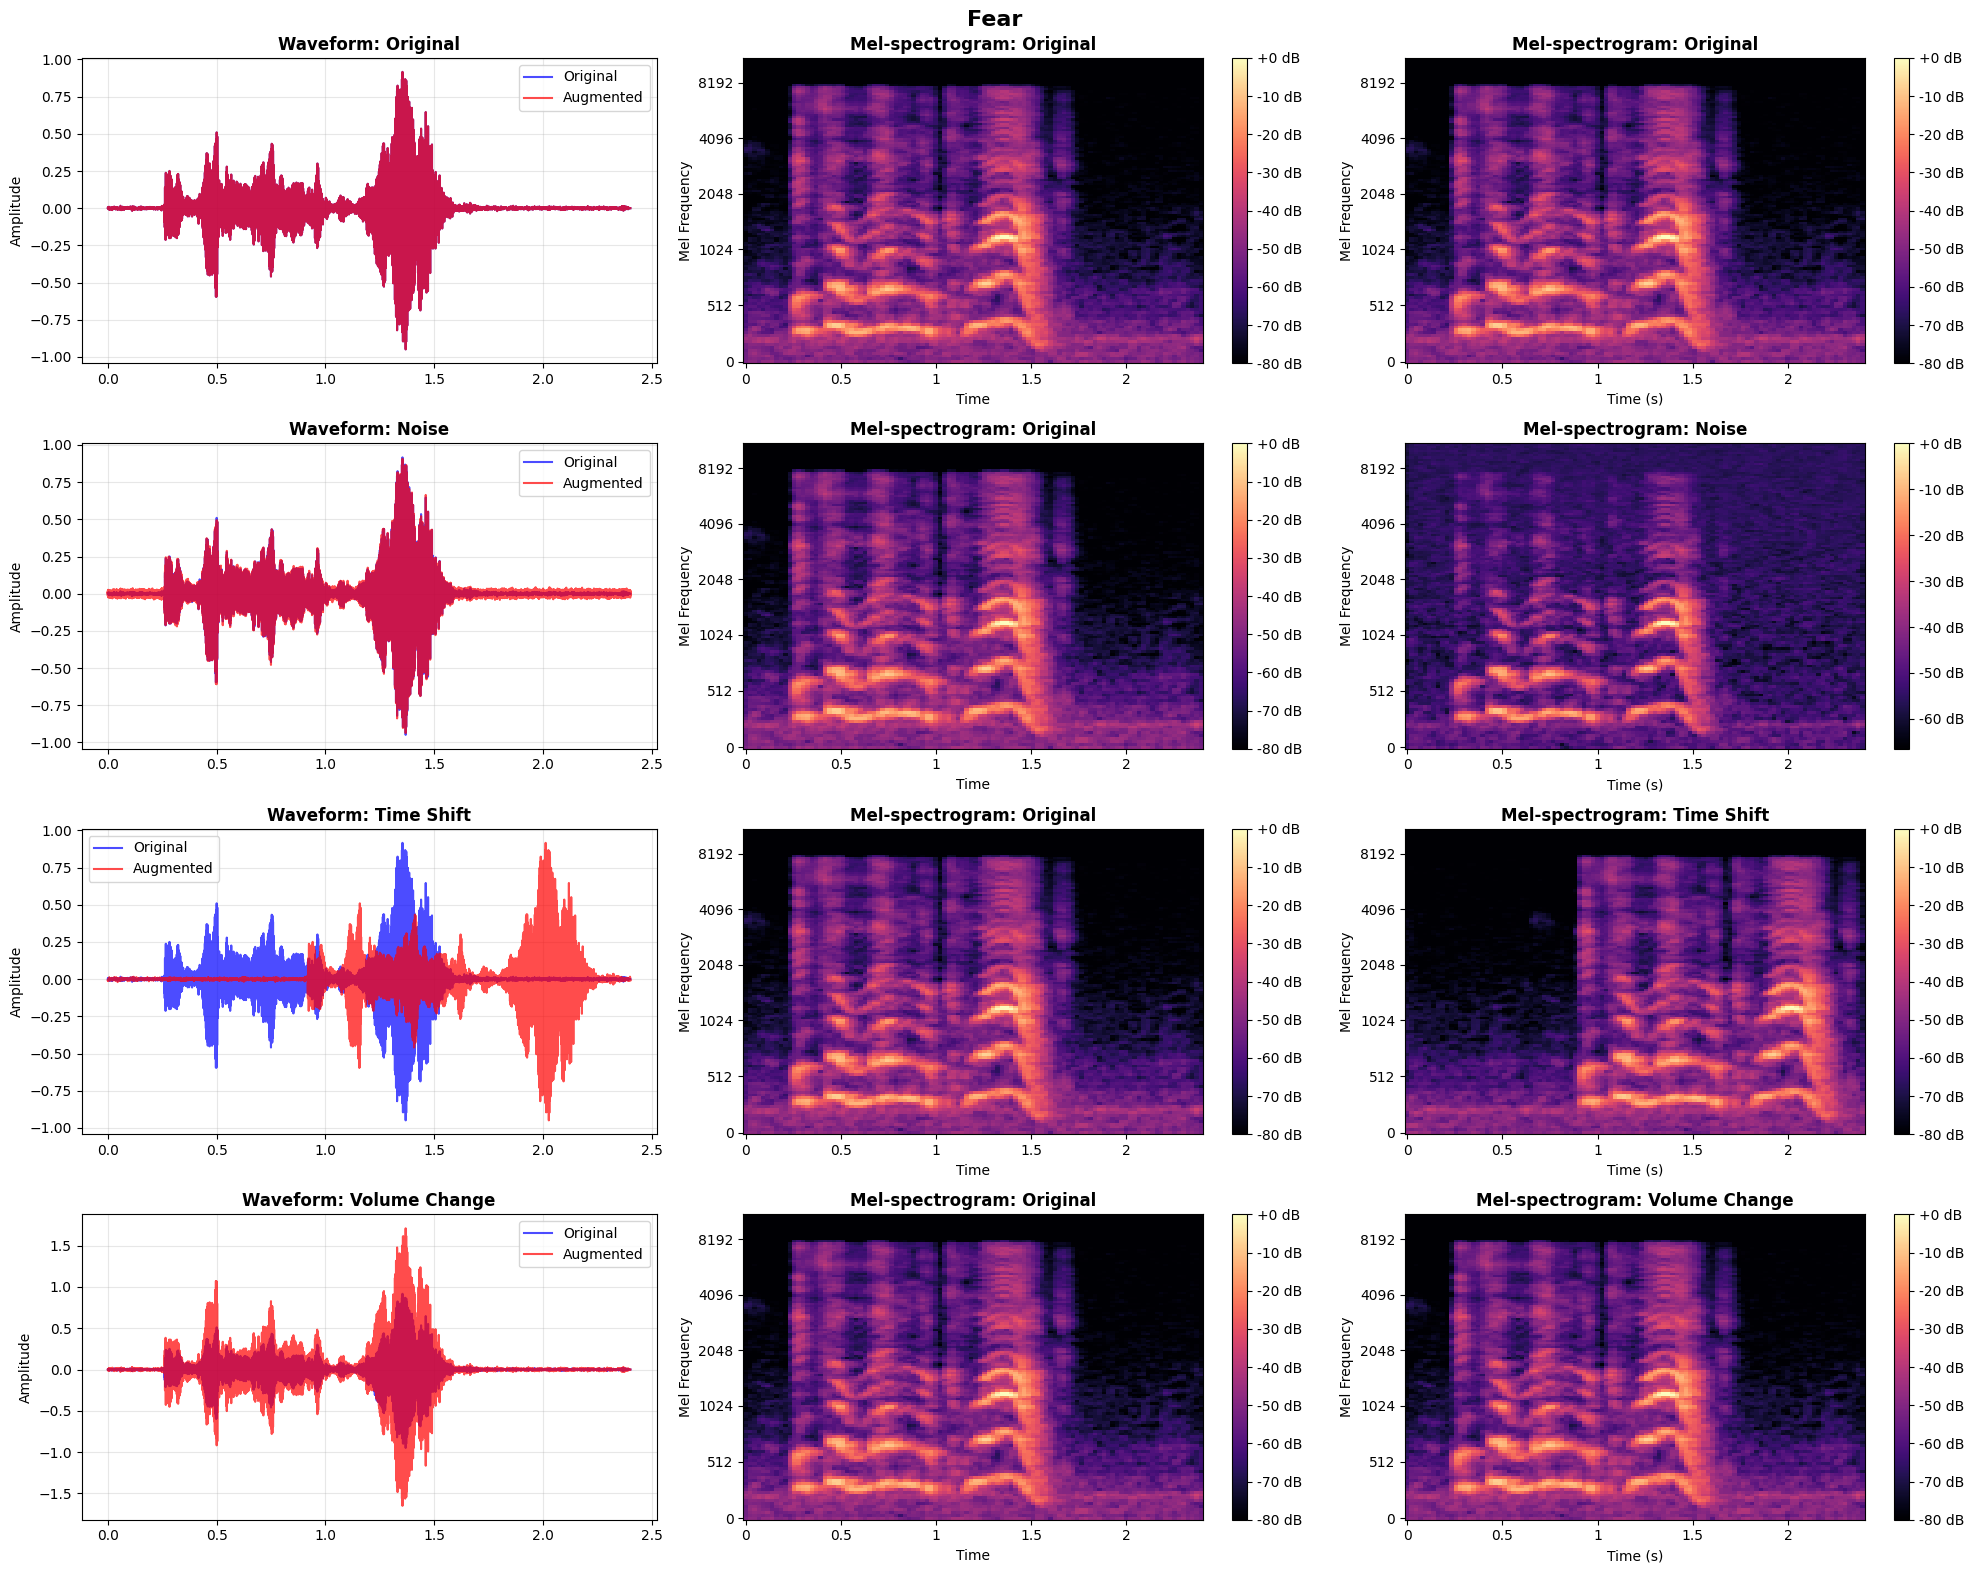


Аугментация для эмоции: Disgust
Файл: 1056_IEO_DIS_HI.wav


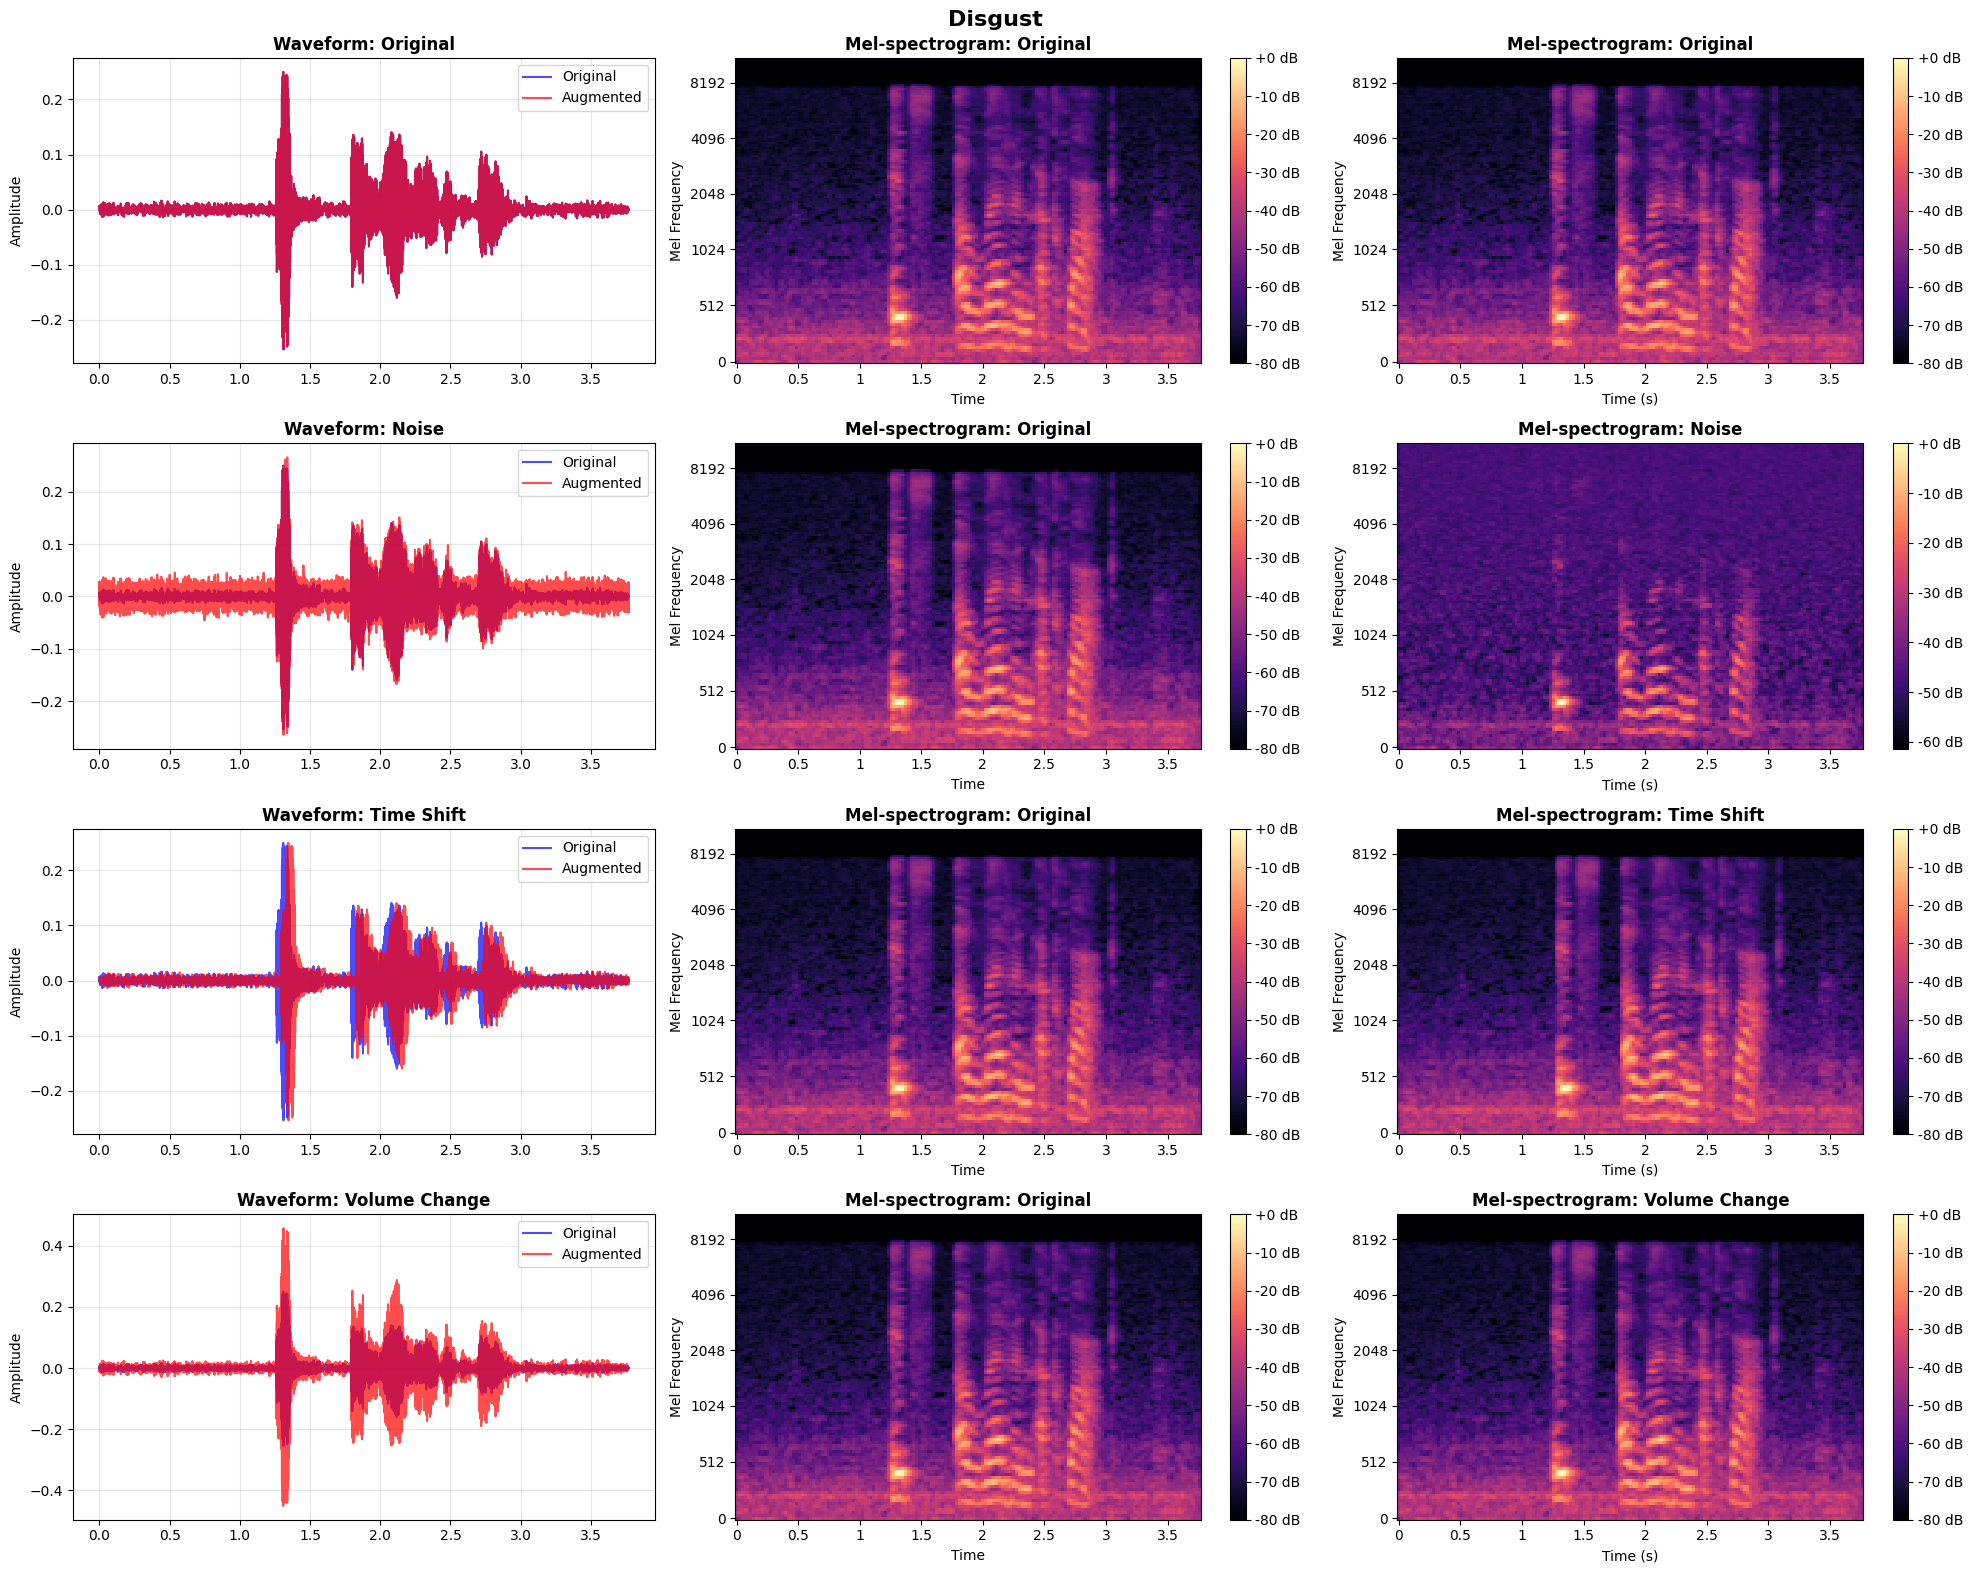


Аугментация для эмоции: Fear
Файл: 1056_IEO_FEA_LO.wav


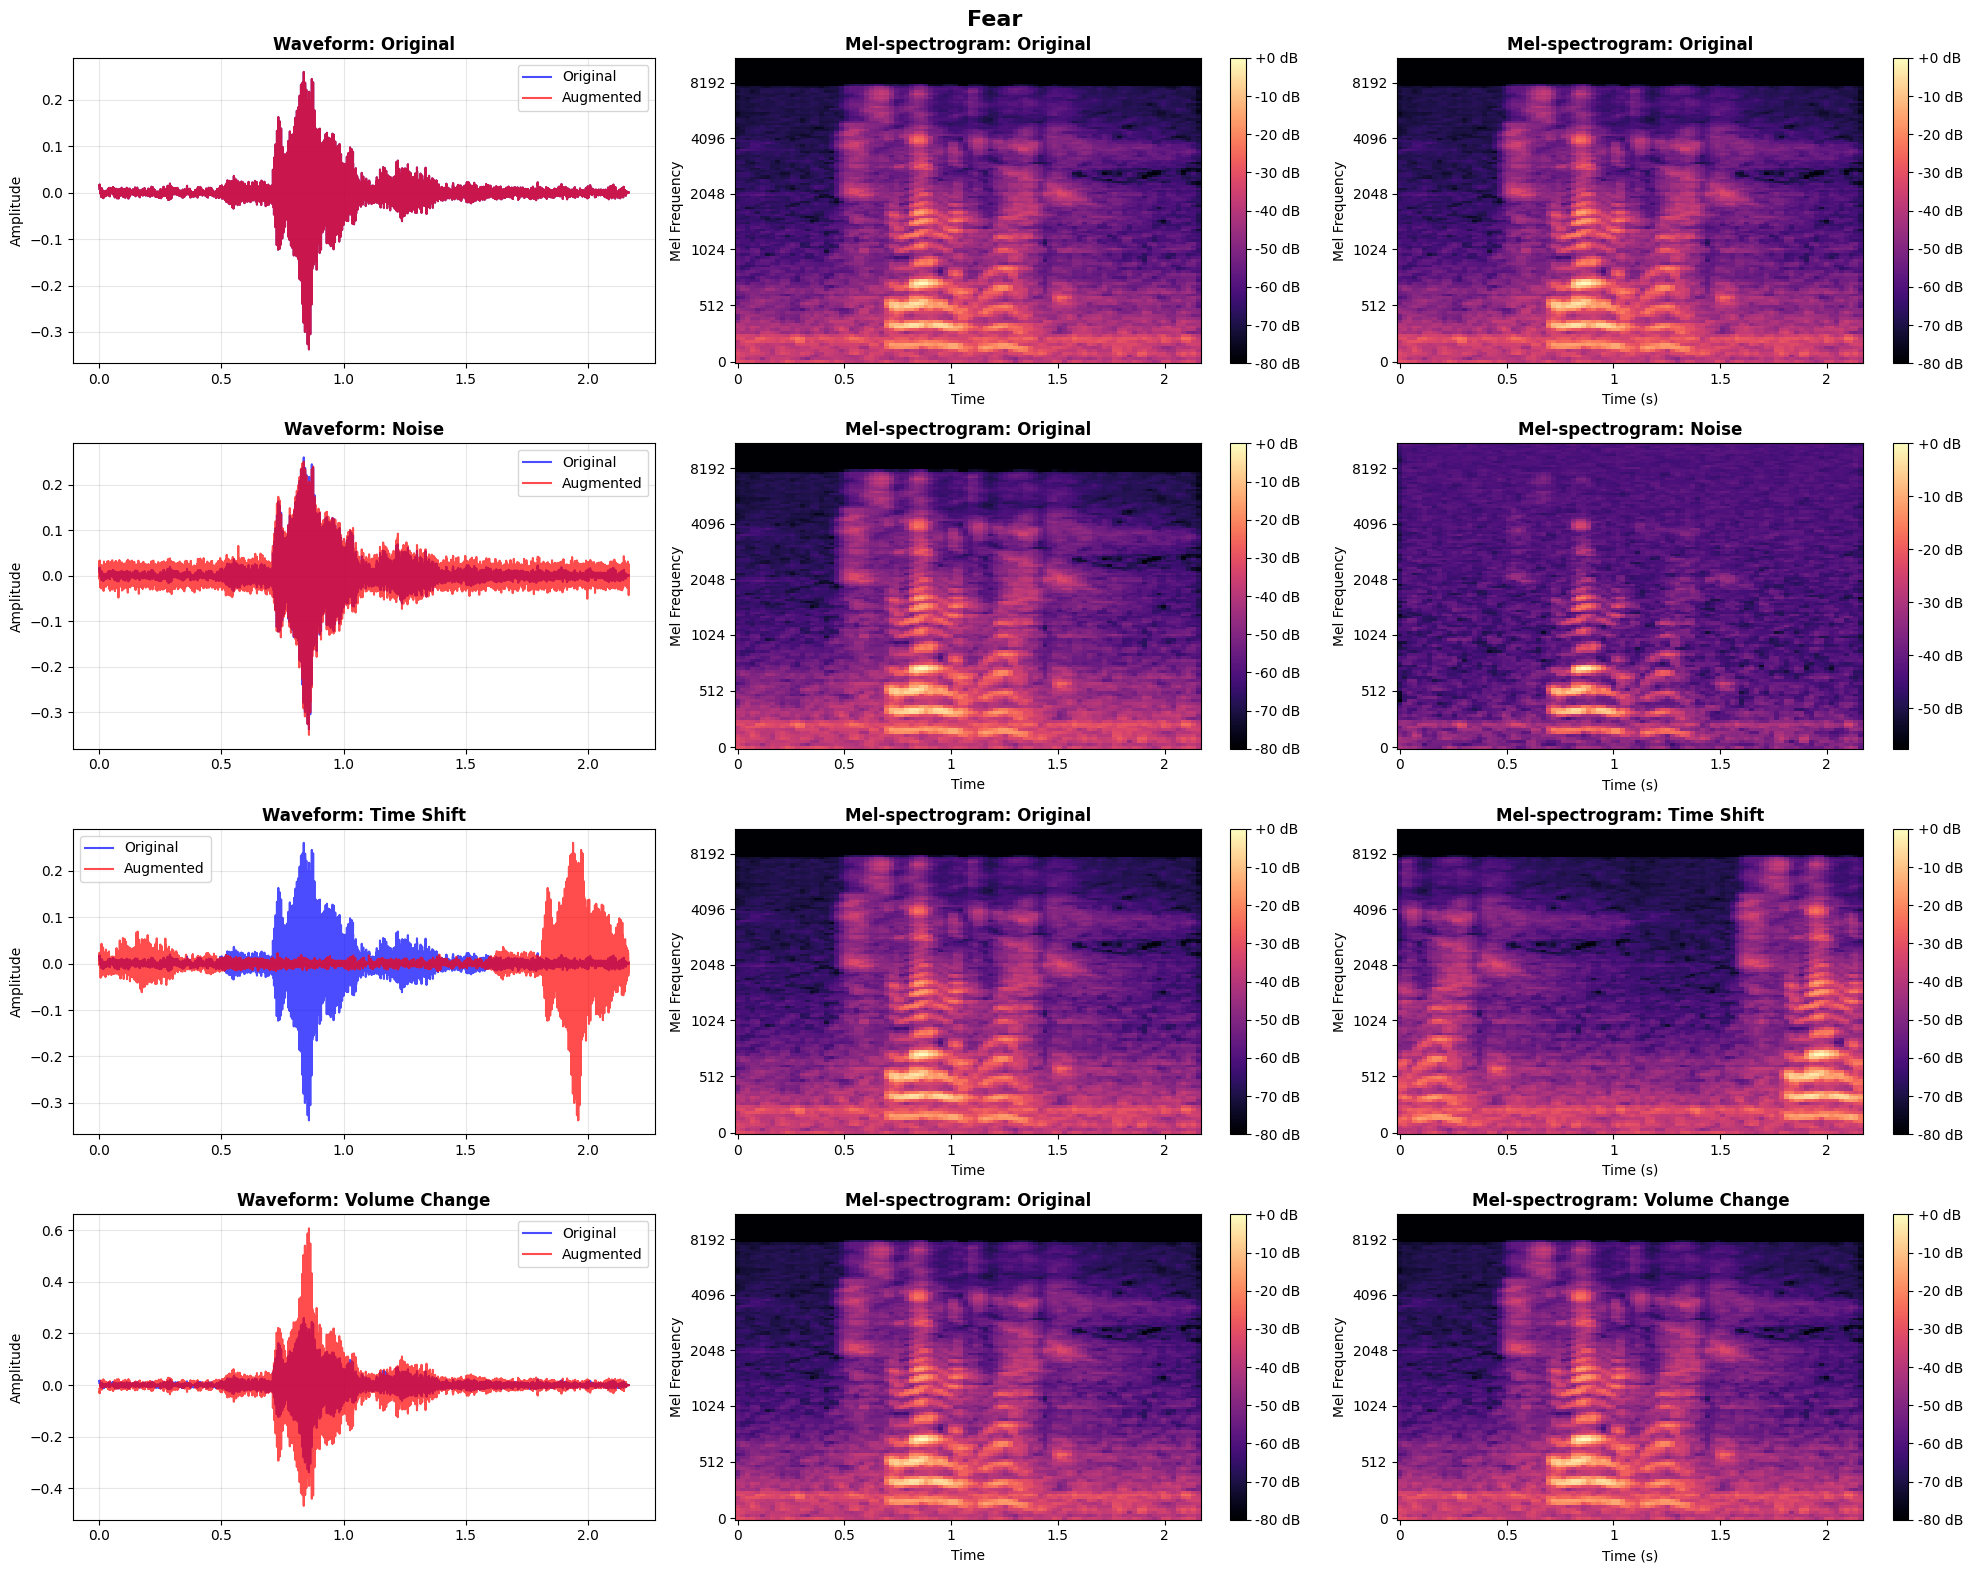


Аугментация для эмоции: Neutral
Файл: 1056_IEO_NEU_XX.wav


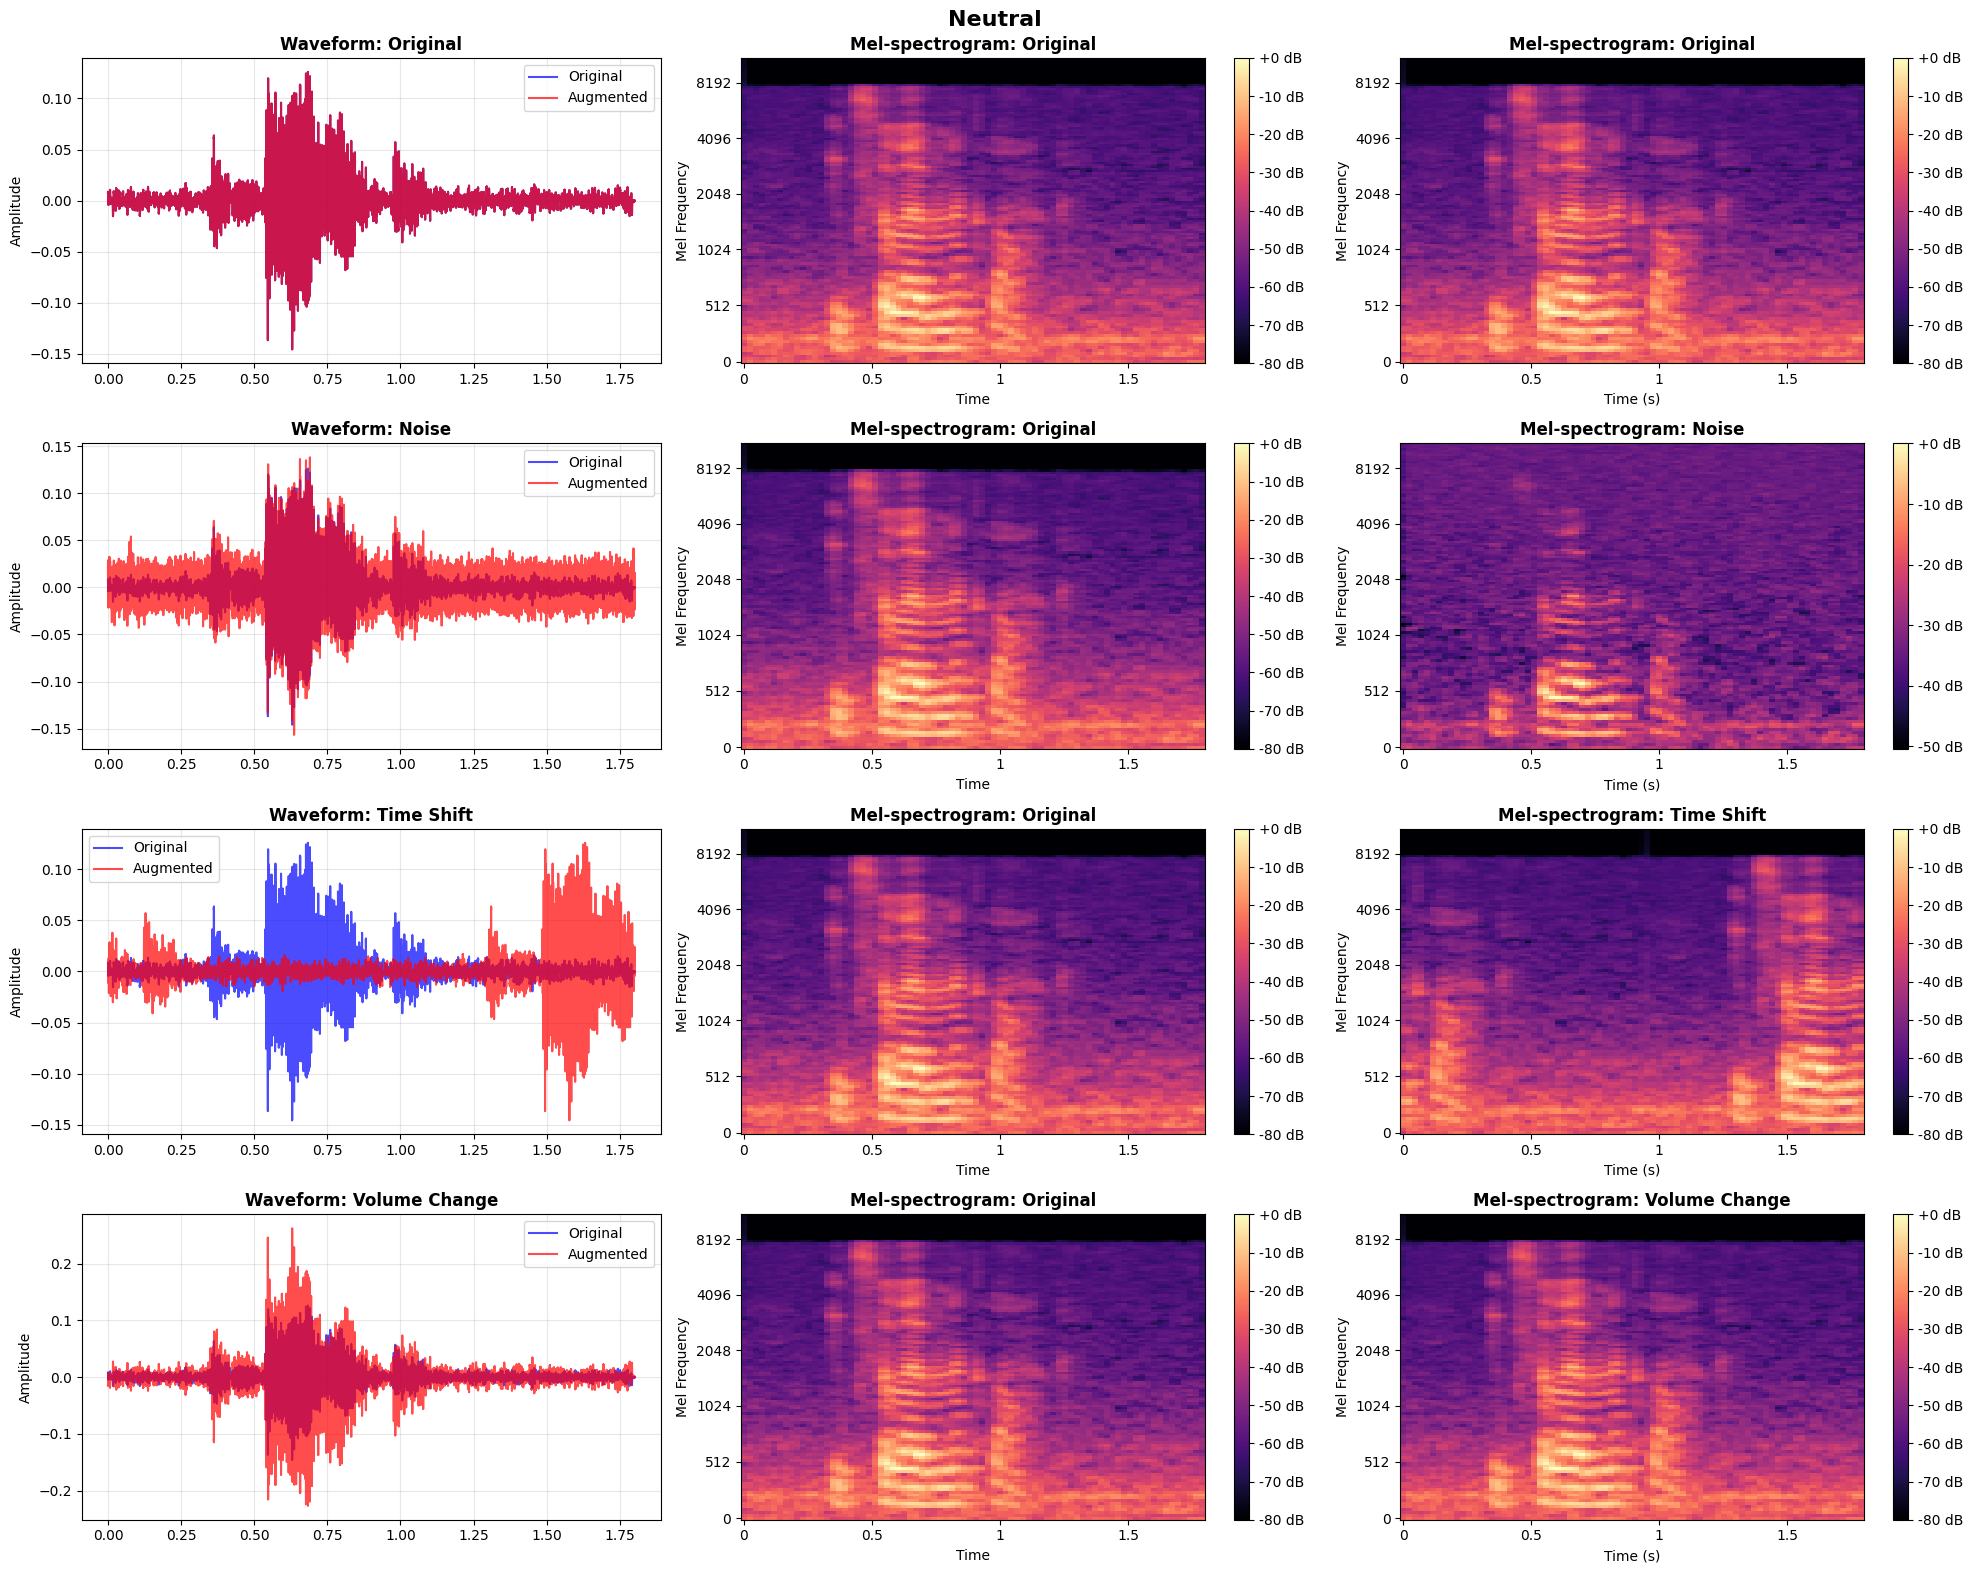


Аугментация для эмоции: Happy
Файл: 1056_IEO_HAP_HI.wav


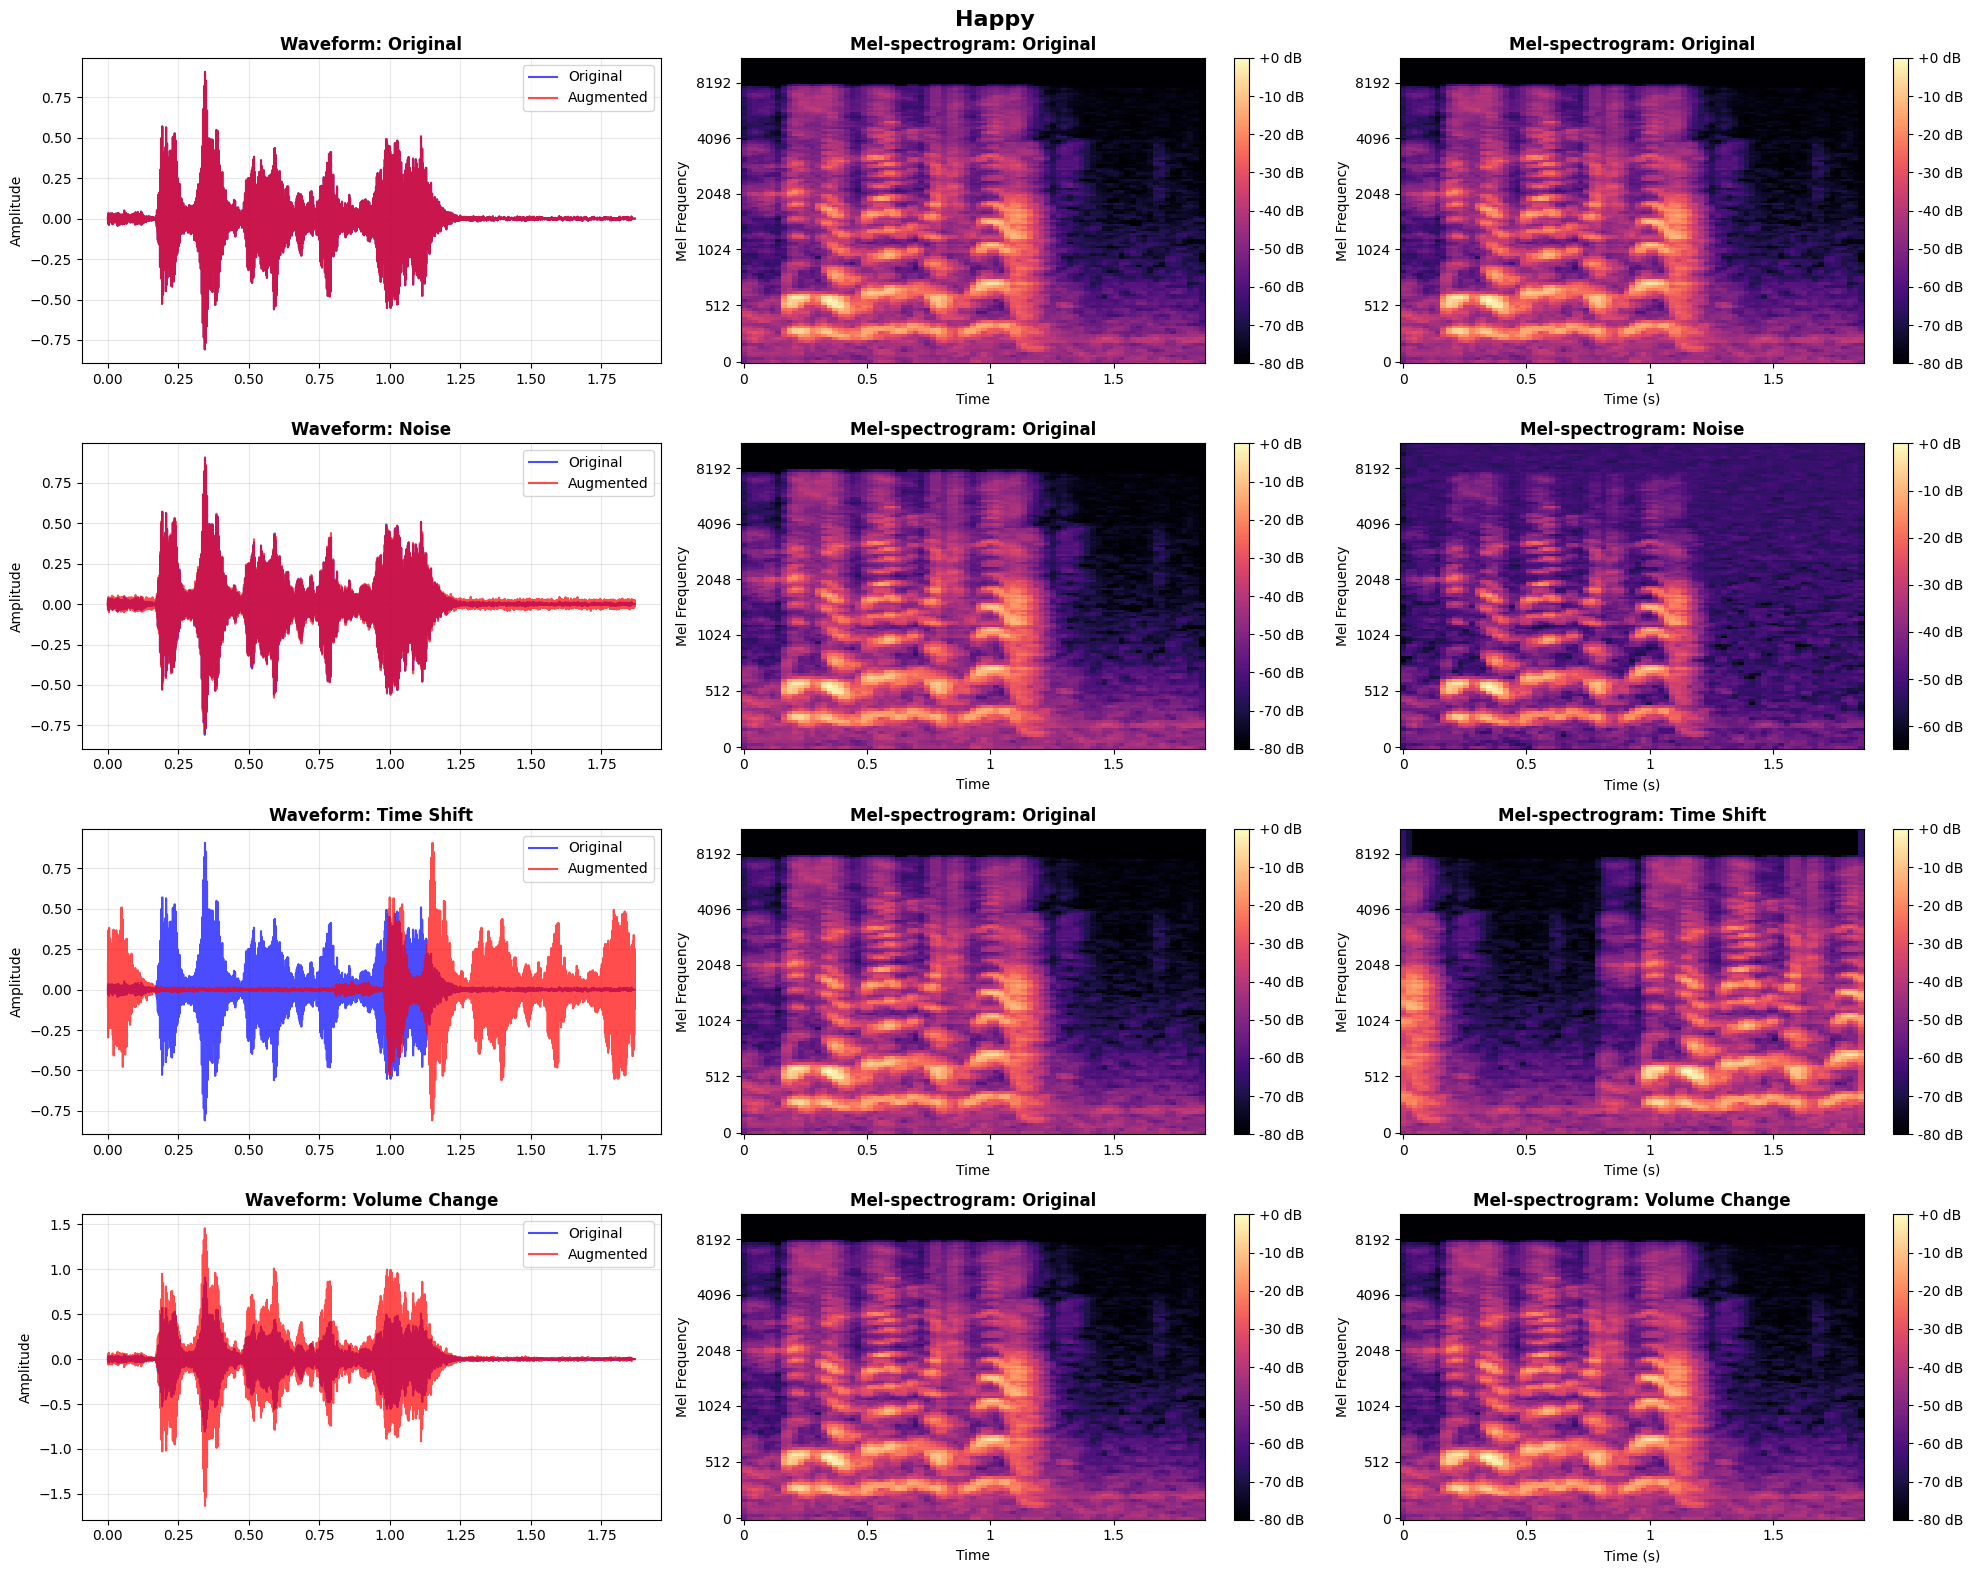

In [ ]:
print("АУГМЕНТАЦИЯ ДАННЫХ (для 5 записей)")

# Берем те же данные, что и ранее (диктор 1027, предложение IEO)
actor_id = '1056'
sentence = 'IEO'
subset_df = df[(df['actor_id'] == actor_id) & (df['sentence'] == sentence)]


for _, row in subset_df[:5].iterrows():
    emotion_name = emotion_names.get(row['emotion'], row['emotion'])
    print(f"\nАугментация для эмоции: {emotion_name}")
    print(f"Файл: {row['filename']}")

    augmented_data = visualize_augmentations(row['filepath'], emotion_name)


Была применена аугментация данных:
- добавление шума: имитируются фоновые шумы и помехи (гауссов шум с уровнем 0.01), что повышает устойчивость модели к посторонним звуковым сигналам (зашумление видно по спектограмме)
- смещение по времени: осуществляется циклический сдвиг сигнала по временной оси на случайную величину (я взяда значение равное 20% от общей длины аудио). Изменения можно увидеть на осцилограмме и спектограаме.
- изменение громкости: помогает модели научиться распознавать сигналы с разной амплитудой, делая ее менее чувствительной к изменениям громкости (можно увиедть по осцилограмме).

# Подгтовка данных для пункта 4 из задания

In [ ]:
def balance_sentences(df, samples_per_sentence=500):
    return (
        df.groupby('sentence')
        .apply(lambda x: x.sample(n=min(samples_per_sentence, len(x)), random_state=42))
        .reset_index(drop=True)
    )

In [ ]:
df = balance_sentences(df, samples_per_sentence=540)

In [ ]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['emotion'])

label2id = dict(zip(le.classes_, le.transform(le.classes_)))
id2label = {v: k for k, v in label2id.items()}

print("Label mapping:", label2id)

Label mapping: {'ANG': np.int64(0), 'DIS': np.int64(1), 'FEA': np.int64(2), 'HAP': np.int64(3), 'NEU': np.int64(4), 'SAD': np.int64(5)}


In [ ]:
train_val, test = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
train, val = train_test_split(train_val, test_size=0.1, stratify=train_val['label'], random_state=42)
print("Sizes:", len(train), len(val), len(test))

Sizes: 4665 519 1296


In [ ]:
label2id = {str(label): int(idx) for label, idx in label2id.items()}
id2label = {int(idx): str(label) for idx, label in id2label.items()}

In [ ]:
label2id['OTH'] = 6
id2label[6] = 'OTH'

In [ ]:
model_id = "firdhokk/speech-emotion-recognition"
model = AutoModelForAudioClassification.from_pretrained(
    model_id,
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


feature_extractor = AutoFeatureExtractor.from_pretrained(model_id)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/262 [00:00<?, ?B/s]

In [ ]:
df.head()

filename actor_id sentence emotion intensity intensity_full  \
0  1091_DFA_SAD_XX.wav     1091      DFA     SAD        XX    Unspecified   
1  1005_DFA_FEA_XX.wav     1005      DFA     FEA        XX    Unspecified   
2  1023_DFA_SAD_XX.wav     1023      DFA     SAD        XX    Unspecified   
3  1006_DFA_SAD_XX.wav     1006      DFA     SAD        XX    Unspecified   
4  1075_DFA_ANG_XX.wav     1075      DFA     ANG        XX    Unspecified   

  emotion_full                              filepath  label  
0          Sad  crema_data/Crema/1091_DFA_SAD_XX.wav      5  
1         Fear  crema_data/Crema/1005_DFA_FEA_XX.wav      2  
2          Sad  crema_data/Crema/1023_DFA_SAD_XX.wav      5  
3          Sad  crema_data/Crema/1006_DFA_SAD_XX.wav      5  
4        Anger  crema_data/Crema/1075_DFA_ANG_XX.wav      0

In [ ]:
print(df.columns)

Index(['filename', 'actor_id', 'sentence', 'emotion', 'intensity',
       'intensity_full', 'emotion_full', 'filepath', 'label'],
      dtype='object')


In [ ]:
from torch.utils.data import Dataset, DataLoader

class CREMAE(Dataset):  # класс для дообучения и подготовки наших данных
    def __init__(self, df, feature_extractor, max_duration=5.0):
        self.df = df.reset_index(drop=True)
        self.fe = feature_extractor
        self.max_dur = max_duration

    # длительность аудио
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        waveform, sr = torchaudio.load(row['filepath'])

        #
        if sr != self.fe.sampling_rate:
            resampler = torchaudio.transforms.Resample(orig_freq=sr, new_freq=self.fe.sampling_rate)
            waveform = resampler(waveform)

        waveform = waveform.squeeze(0).numpy()

        # приведение к единому формату данных (по длительности)
        max_len = int(self.fe.sampling_rate * self.max_dur)
        if len(waveform) > max_len:
            waveform = waveform[:max_len]
        else:
            waveform = np.pad(waveform, (0, max_len - len(waveform)), mode='constant')

        inputs = self.fe(waveform, sampling_rate=self.fe.sampling_rate, return_tensors="pt")
        inputs = {k: v.squeeze(0) for k, v in inputs.items()}
        inputs["labels"] = torch.tensor(row['label'], dtype=torch.long) # наши метки
        return inputs

def collate_fn(batch):
    return {key: torch.stack([item[key] for item in batch]) for key in batch[0]}


In [ ]:
train_dataset = CREMAE(train, feature_extractor)
val_dataset = CREMAE(val, feature_extractor)
test_dataset = CREMAE(test, feature_extractor)


train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=5, shuffle=False, collate_fn=collate_fn)

In [ ]:
import torch.nn as nn
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5) # при лернинг рейте 0.01, 0.05, 0.001 было ооочень плохо (train loss либоNan, либо 44)
num_epochs = 7

train_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        inputs = {k: v.to(device) for k, v in batch.items()}
        labels = inputs.pop("labels")

        outputs = model(**inputs, labels=labels)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    avg_train_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}")

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in val_loader:
            inputs = {k: v.to(device) for k, v in batch.items()}
            labels = inputs.pop("labels")
            outputs = model(**inputs)
            preds = torch.argmax(outputs.logits, dim=-1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            torch.cuda.empty_cache()

    val_acc = correct / total
    print(f"Epoch {epoch+1}: Val Accuracy = {val_acc:.4f}")

    train_losses.append(avg_train_loss)
    val_accuracies.append(val_acc)

Epoch 1: 100%|██████████| 933/933 [15:40<00:00,  1.01s/it]


Epoch 1: Train Loss = 1.2001
Epoch 1: Val Accuracy = 0.6956


Epoch 2: 100%|██████████| 933/933 [15:31<00:00,  1.00it/s]


Epoch 2: Train Loss = 0.8051
Epoch 2: Val Accuracy = 0.7187


Epoch 3: 100%|██████████| 933/933 [15:33<00:00,  1.00s/it]


Epoch 3: Train Loss = 0.6546
Epoch 3: Val Accuracy = 0.7669


Epoch 4: 100%|██████████| 933/933 [15:31<00:00,  1.00it/s]


Epoch 4: Train Loss = 0.5578
Epoch 4: Val Accuracy = 0.7592


Epoch 5: 100%|██████████| 933/933 [15:29<00:00,  1.00it/s]


Epoch 5: Train Loss = 0.4667
Epoch 5: Val Accuracy = 0.7649


Epoch 6: 100%|██████████| 933/933 [15:29<00:00,  1.00it/s]


Epoch 6: Train Loss = 0.4080
Epoch 6: Val Accuracy = 0.7592


Epoch 7: 100%|██████████| 933/933 [15:29<00:00,  1.00it/s]


Epoch 7: Train Loss = 0.3316
Epoch 7: Val Accuracy = 0.7707


In [ ]:
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False, collate_fn=collate_fn)
model.eval()
correct, total = 0, 0
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Testing on testing data"):
        inputs = {k: v.to(device) for k, v in batch.items()}
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        preds = torch.argmax(outputs.logits, dim=-1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())



print(f"\nTest Accuracy (after 5 ep.): {correct / total:.4f}\n")

Testing on testing data: 100%|██████████| 648/648 [01:32<00:00,  6.99it/s]


Test Accuracy (after 5 ep.): 0.7863



[1, 2, 3, 4, 5, 6, 7]
[1.200134337986525, 0.8050579828752199, 0.6546372900071123, 0.5578229575031631, 0.4666653272215704, 0.40801416830202647, 0.33157660167300945]
[0.6955684007707129, 0.7186897880539499, 0.766859344894027, 0.7591522157996147, 0.7649325626204239, 0.7591522157996147, 0.7707129094412332]


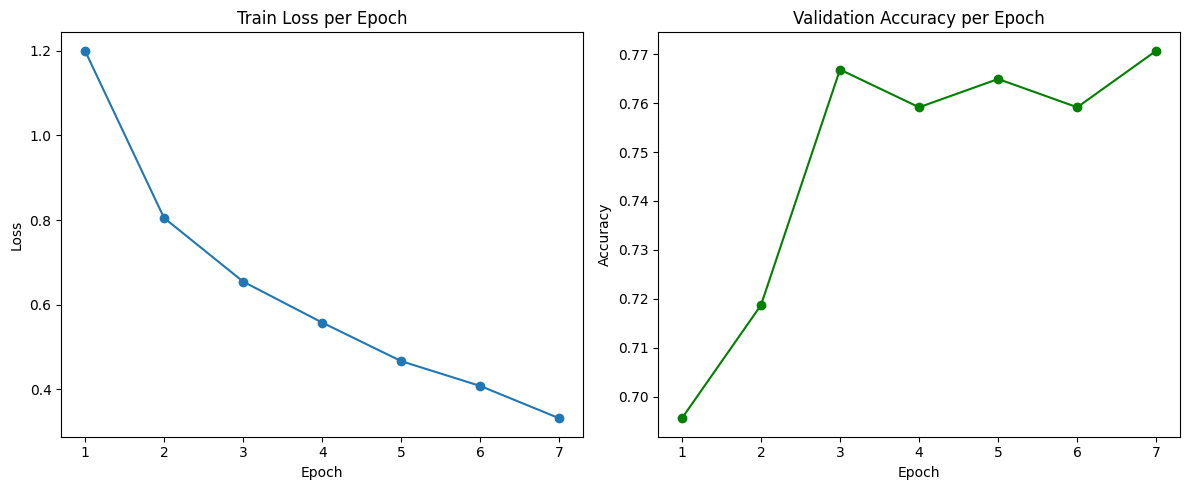

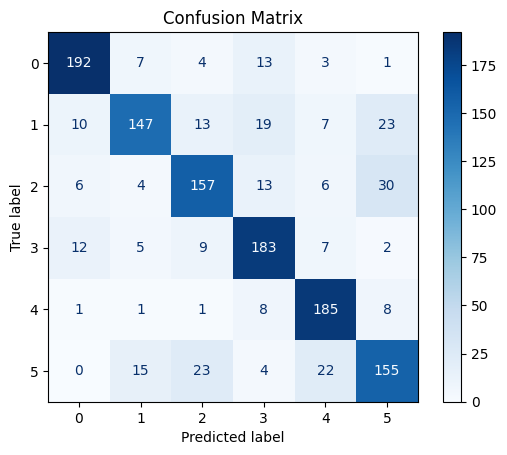

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns


epochs = list(range(1, num_epochs + 1))
print(epochs)
print(train_losses)
print(val_accuracies)

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, marker='o')
plt.title("Train Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracies, marker='o', color='green')
plt.title("Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()


cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

- Ссылка на модель: https://huggingface.co/firdhokk/speech-emotion-recognition

- Как видно по графику confusion matrix даже при 7 эпохах обучения результаты достаточно хорошие
- Хуже всего распознается эмоция disappointed
- А лучше всего angry (это мне кажется было очевидно, что будет лучше всего распознаваться, еще на этапе анализа спектограмм)